In [54]:
import numpy as np
import pickle as pkl
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.patches as patches
import os
import sys
sys.path.append('/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Model_utils/')
import other_billeh_utils
import sklearn
import skimage

## Load dataset, preproces and save

In [2]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414
# Define the time bins 250 ms stim len
time_bins = np.array([[100, 350], [450, 700], [800, 1050], [1150, 1400]])
n_timesteps = (time_bins[0,1] - time_bins[0,0]) + (time_bins[1,1] - time_bins[1,0]) + (time_bins[2,1] - time_bins[2,0]) + (time_bins[3,1] - time_bins[3,0])
print("time-steps of stimulus", n_timesteps)
v1_sums = np.zeros((n_rows, n_cols, n_neurons_v1)) # sum of all spikes per neuron and position
lm_all = np.zeros((n_rows, n_cols, n_neurons_lm)) # sum of all spikes per neuron and position

time-steps of stimulus 1000


In [3]:
for col in tqdm(range(n_cols)):
    for row in range(n_rows):
        data_file = 'Data_disconnected/simulation_data_row_'+str(row)+'_col_'+str(col)+'.hdf5'

        # Open the file in read mode
        file = h5py.File(data_file, 'r')

        # Access the 'Data' group
        data_group = file['Data']

        data = {}

        # Loop over the subgroups ('v1', 'lm', 'LGN')
        for subgroup_name in data_group.keys():
            # Access the subgroup
            subgroup = data_group[subgroup_name]
            
            # Access the 'z' dataset in the subgroup
            name = str(row)+'_'+str(col)
            dataset = subgroup[name] 
            
            # Convert the dataset to a numpy array and store it in the dictionary
            data[subgroup_name] = np.array(dataset)

        # Close the file
        file.close()

        v1 = data['v1']
        lm = data['lm']
        LGN = data['LGN']

        for time_bin in time_bins:
            v1_sums[row, col, :] += np.sum(v1[:, time_bin[0]:time_bin[1]], axis=(0,1))
            lm_all[row, col, :] += np.sum(lm[:, time_bin[0]:time_bin[1]], axis=(0,1))

# save the data
with open('Data_disconnected/v1_sums.pkl', 'wb') as f:
    pkl.dump(v1_sums, f)

with open('Data_disconnected/lm_sums.pkl', 'wb') as f:
    pkl.dump(lm_all, f)

print('Data saved')
        

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [34:08<00:00, 186.23s/it]


Data saved


In [5]:
# load the data
with open('Data_50trials/v1_sums.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_50trials/lm_sums.pkl', 'rb') as f:
    lm_all = pkl.load(f)

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000

## Load dataset only for one orientation

In [55]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414
# Define the time bins 250 ms stim len
time_bins = np.array([[450, 700]])
n_timesteps = (time_bins[0,1] - time_bins[0,0])
print("time-steps of stimulus", n_timesteps)
v1_sums = np.zeros((n_rows, n_cols, n_neurons_v1)) # sum of all spikes per neuron and position
lm_all = np.zeros((n_rows, n_cols, n_neurons_lm)) # sum of all spikes per neuron and position

time-steps of stimulus 250


In [56]:
for col in tqdm(range(n_cols)):
    for row in range(n_rows):
        data_file = 'Data_disconnected/simulation_data_row_'+str(row)+'_col_'+str(col)+'.hdf5'

        # Open the file in read mode
        file = h5py.File(data_file, 'r')

        # Access the 'Data' group
        data_group = file['Data']

        data = {}

        # Loop over the subgroups ('v1', 'lm', 'LGN')
        for subgroup_name in data_group.keys():
            # Access the subgroup
            subgroup = data_group[subgroup_name]
            
            # Access the 'z' dataset in the subgroup
            name = str(row)+'_'+str(col)
            dataset = subgroup[name] 
            
            # Convert the dataset to a numpy array and store it in the dictionary
            data[subgroup_name] = np.array(dataset)

        # Close the file
        file.close()

        v1 = data['v1']
        lm = data['lm']
        LGN = data['LGN']

        for time_bin in time_bins:
            v1_sums[row, col, :] += np.sum(v1[:, time_bin[0]:time_bin[1]], axis=(0,1))
            lm_all[row, col, :] += np.sum(lm[:, time_bin[0]:time_bin[1]], axis=(0,1))

# save the data
with open('Data_disconnected/v1_sums_1or.pkl', 'wb') as f:
    pkl.dump(v1_sums, f)

# with open('Data_50trials/lm_sums_1or.pkl', 'wb') as f:
#     pkl.dump(lm_all, f)

print('Data saved')
        

100%|██████████| 11/11 [31:06<00:00, 169.69s/it]

Data saved


## Load dataset with trials

In [52]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414
# Define the time bins 250 ms stim len
time_bins = np.array([[100, 350], [450, 700], [800, 1050], [1150, 1400]])
n_timesteps = (time_bins[0,1] - time_bins[0,0]) + (time_bins[1,1] - time_bins[1,0]) + (time_bins[2,1] - time_bins[2,0]) + (time_bins[3,1] - time_bins[3,0])
print("time-steps of stimulus", n_timesteps)
v1_sums_trials = np.zeros((n_rows, n_cols, n_trials, n_neurons_v1)) # sum of all spikes per neuron and position
lm_all_trials = np.zeros((n_rows, n_cols, n_trials, n_neurons_lm)) # sum of all spikes per neuron and position

time-steps of stimulus 1000


In [53]:
for col in tqdm(range(n_cols)):
    for row in range(n_rows):
        data_file = 'Data_50trials/simulation_data_row_'+str(row)+'_col_'+str(col)+'.hdf5'

        # Open the file in read mode
        file = h5py.File(data_file, 'r')

        # Access the 'Data' group
        data_group = file['Data']

        data = {}

        # Loop over the subgroups ('v1', 'lm', 'LGN')
        for subgroup_name in data_group.keys():
            # Access the subgroup
            subgroup = data_group[subgroup_name]
            
            # Access the 'z' dataset in the subgroup
            name = str(row)+'_'+str(col)
            dataset = subgroup[name] 
            
            # Convert the dataset to a numpy array and store it in the dictionary
            data[subgroup_name] = np.array(dataset)

        # Close the file
        file.close()

        v1 = data['v1']
        lm = data['lm']
        LGN = data['LGN']

        for time_bin in time_bins:
            for trial in range(n_trials):
                v1_sums_trials[row, col, trial, :] += np.sum(v1[trial, time_bin[0]:time_bin[1]], axis=(0))
                lm_all_trials[row, col, trial, :] += np.sum(lm[trial, time_bin[0]:time_bin[1]], axis=(0))

# save the data
with open('Data_50trials/v1_sums_trials.pkl', 'wb') as f:
    pkl.dump(v1_sums_trials, f)

with open('Data_50trials/lm_sums_trials.pkl', 'wb') as f:
     pkl.dump(lm_all_trials, f)

print('Data saved')

# remember v1 and lm are structured as (trials, time, neurons)

100%|██████████| 11/11 [36:42<00:00, 200.27s/it]


Data saved


In [51]:
# just checking the data
print(v1[0, time_bin[0]:time_bin[1]].shape)
print(np.sum(v1[0, time_bin[0]:time_bin[1]], axis=(0)).shape)
print(np.sum(v1[0, time_bin[0]:time_bin[1]], axis=(0))[3743])
print(v1_sums_trials.shape)

(250, 51978)
(51978,)
1
(13, 11, 50, 51978)


## Plot receptive field for individual V1 neurons (RUN)

In [44]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414

# Define the time bins 250 ms stim len
time_bins = np.array([[100, 350], [450, 700], [800, 1050], [1150, 1400]])
n_timesteps = (time_bins[0,1] - time_bins[0,0]) + (time_bins[1,1] - time_bins[1,0]) + (time_bins[2,1] - time_bins[2,0]) + (time_bins[3,1] - time_bins[3,0])

# load the data
with open('Data_50trials/v1_sums.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_50trials/lm_sums.pkl', 'rb') as f:
    lm_all = pkl.load(f)

with open('Data_disconnected/v1_sums.pkl', 'rb') as f:
     v1_sums_dis = pkl.load(f)

# select disconnected or connected
# v1_sums = v1_sums_dis
# lm_all = lm_all_dis

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000
v1_sums_dis = v1_sums_dis / (n_trials * n_timesteps) * 1000

Neurons that are good examples:
- From L4 Exc: 34000
34003
34006
34010 (almost any L4 Exc neuron I think)

- From L2/3 Exc: 
10025

- From L5 Exc: 4
348

- From L6 Exc: 50003
50024




In [45]:
# select a neuron
neuron_id = 10025

# get neuron's position
cache_path = '/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Model_utils/.cache/lm_v1_network_v1_100000_lm_30000.pkl'
with open(cache_path, 'rb') as f:
    networks, lgn_inputs, bkg_inputs = pkl.load(f)

# in networks['v1'] 'x' and 'z' are the 2 radial coordinates, and y is the depth in the column which I don't need
v1_positions_x = np.array(networks['v1']['x'])
v1_positions_z = np.array(networks['v1']['z'])

# filter only core neurons that follow r = np.sqrt(x ** 2 + z ** 2) < 400
r = np.sqrt(v1_positions_x ** 2 + v1_positions_z ** 2)
selected_mask = r < 400
v1_positions_x_core = v1_positions_x[selected_mask]
v1_positions_z_core = v1_positions_z[selected_mask]

# get the position of the neuron
neuron_pos = v1_positions_x_core[neuron_id], v1_positions_z_core[neuron_id]

neuron_pos = ((neuron_pos[0]/1000 * 70/10)+6.5, (neuron_pos[1]/1000 * 40/10)+5.5) # neuron projection to visual space

print('Neuron position:', neuron_pos)

Neuron position: (8.850862030029298, 5.62102685546875)


In [46]:
# obtain an array with all neurons positions
neurons_positions = np.zeros((n_neurons_v1, 2))
for id in range(n_neurons_v1):
    neuron_pos = v1_positions_x_core[id], v1_positions_z_core[id]
    neuron_pos = ((neuron_pos[0]/1000 * 70/10)+6.5, (neuron_pos[1]/1000 * 40/10)+5.5) # neuron projection to visual space
    neurons_positions[id] = neuron_pos

In [47]:
# Create the neuron types mask
# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

# get the neuron type of the selected neuron
neuron_type = cell_types_v1[neuron_id]

print('Neuron type:', neuron_type)

Neuron type: L2/3 Exc


Minimum value: 0.34
Expected value: 0.46
threshold 0.14402922997932616


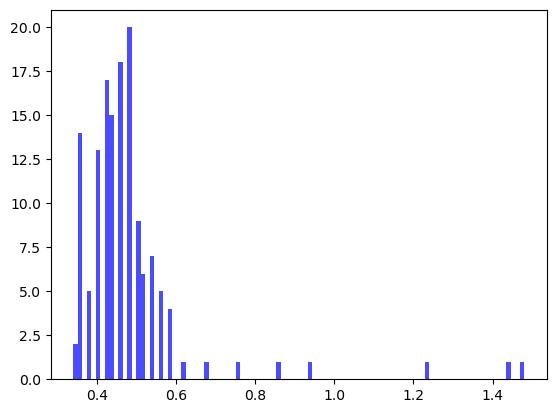

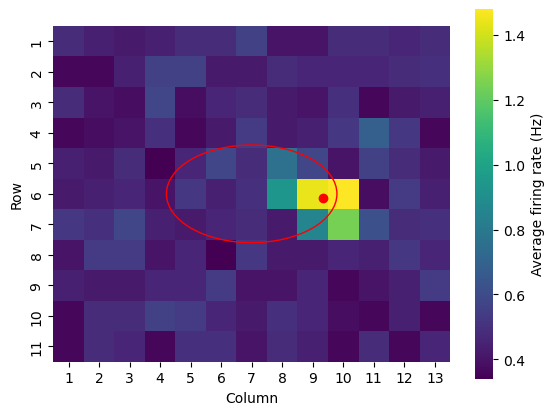

In [48]:
# select the given neuron
v1_neuron = np.copy(v1_sums[:,:,neuron_id])
expected_value = np.median(v1_neuron)

# plot histogram of the neuron
plt.figure()
plt.hist(v1_neuron.flatten(), bins=100, color='b', alpha=0.7)
print("Minimum value:", np.min(v1_neuron))
print('Expected value:', expected_value)

# # set to expected value all the values below a th
th = expected_value - 2*np.std(v1_neuron)
v1_neuron[v1_neuron < th] = expected_value

# plot without gaussian filter
plt.figure()
ax = sns.heatmap(v1_neuron.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)

plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels);
ax.set_yticklabels(ylabels);

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
neuron_pos = neurons_positions[neuron_id]
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

print("threshold", th)


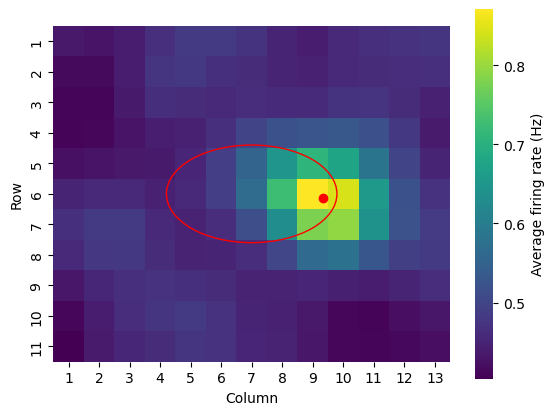

In [49]:
# Apply Gaussian filter
v1_neuron_smooth = scipy.ndimage.gaussian_filter(v1_neuron, sigma=1)

# plot the receptive field as a heatmap
plt.figure()
ax = sns.heatmap(v1_neuron_smooth.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True) 
plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

plt.show()

Center of mass: (9.166666666666666, 5.833333333333333)
Area: 3
threshold: 0.7901855017126287


/tmp/ipykernel_3798000/3716060860.py:39: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  com = scipy.ndimage.measurements.center_of_mass(v1_neuron_thresholded)


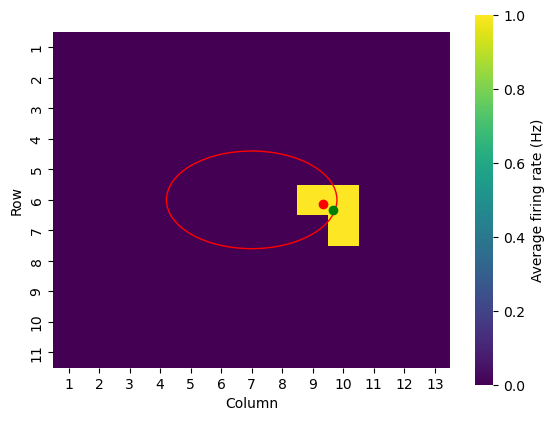

In [50]:
# now apply the threshold at max(RF) – std(RF)
threshold = np.max(v1_neuron_smooth) - np.std(v1_neuron_smooth)
v1_neuron_thresholded = np.zeros(v1_neuron_smooth.shape)
v1_neuron_thresholded[v1_neuron_smooth > threshold] = 1

# plot the thresholded receptive field
plt.figure()
ax = sns.heatmap(v1_neuron_thresholded.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

# compute the center of mass of the thresholded RF
com = scipy.ndimage.measurements.center_of_mass(v1_neuron_thresholded)
com = (com[0]+0.5, com[1]+0.5)

# plot the center of mass
plt.plot(com[0],com[1] , 'go')

print('Center of mass:', com)

# compute the area of the receptive field
# def select_connected_component(neuron_thresholded, neuron_pos):
#     neuron_thresholded = skimage.measure.label(neuron_thresholded)
#     coms = scipy.ndimage.measurements.center_of_mass(neuron_thresholded, labels=neuron_thresholded, index=range(1, np.max(neuron_thresholded)+1))
#     coms = [(com[0]+0.5, com[1]+0.5) for com in coms]
#     distances = [np.sqrt((neuron_pos[0]-coms[i][0])**2 + (neuron_pos[1]-coms[i][1])**2) for i in range(len(coms))]
#     neuron_thresholded = neuron_thresholded == np.argmin(distances) + 1

#     return neuron_thresholded

# v1_neuron_thresholded = select_connected_component(v1_neuron_thresholded, neuron_pos)

# select the largest connected component
# compute the area of the thresholded RF
# select the largest connected component
neuron_thresholded = skimage.measure.label(v1_neuron_thresholded)
v1_neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)

area = np.sum(v1_neuron_thresholded)
print('Area:', area)
print('threshold:', threshold)

plt.show()

## Plot RF individual neurons (ONE ORIENTATION)

In [37]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414

# Define the time bins 250 ms stim len
# time_bins = np.array([[100, 350], [450, 700], [800, 1050], [1150, 1400]])
# n_timesteps = (time_bins[0,1] - time_bins[0,0]) + (time_bins[1,1] - time_bins[1,0]) + (time_bins[2,1] - time_bins[2,0]) + (time_bins[3,1] - time_bins[3,0])

time_bins = np.array([[450,700]])
n_timesteps = (time_bins[0,1] - time_bins[0,0])

# load the data
with open('Data_50trials/v1_sums_1or.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_50trials/lm_sums_1or.pkl', 'rb') as f:
    lm_all = pkl.load(f)

# with open('Data_disconnected/v1_sums_1or.pkl', 'rb') as f:
#      v1_sums_dis = pkl.load(f)

# select disconnected or connected
# v1_sums = v1_sums_dis
# lm_all = lm_all_dis

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000
# v1_sums_dis = v1_sums_dis / (n_trials * n_timesteps) * 1000

In [38]:
# select a neuron
neuron_id = 10025

# get neuron's position
cache_path = '/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/Model_utils/.cache/lm_v1_network_v1_100000_lm_30000.pkl'
with open(cache_path, 'rb') as f:
    networks, lgn_inputs, bkg_inputs = pkl.load(f)

# in networks['v1'] 'x' and 'z' are the 2 radial coordinates, and y is the depth in the column which I don't need
v1_positions_x = np.array(networks['v1']['x'])
v1_positions_z = np.array(networks['v1']['z'])

# filter only core neurons that follow r = np.sqrt(x ** 2 + z ** 2) < 400
r = np.sqrt(v1_positions_x ** 2 + v1_positions_z ** 2)
selected_mask = r < 400
v1_positions_x_core = v1_positions_x[selected_mask]
v1_positions_z_core = v1_positions_z[selected_mask]

# get the position of the neuron
neuron_pos = v1_positions_x_core[neuron_id], v1_positions_z_core[neuron_id]

neuron_pos = ((neuron_pos[0]/1000 * 70/10)+6.5, (neuron_pos[1]/1000 * 40/10)+5.5) # neuron projection to visual space

print('Neuron position:', neuron_pos)

Neuron position: (8.850862030029298, 5.62102685546875)


In [39]:
# obtain an array with all neurons positions
neurons_positions = np.zeros((n_neurons_v1, 2))
for id in range(n_neurons_v1):
    neuron_pos = v1_positions_x_core[id], v1_positions_z_core[id]
    neuron_pos = ((neuron_pos[0]/1000 * 70/10)+6.5, (neuron_pos[1]/1000 * 40/10)+5.5) # neuron projection to visual space
    neurons_positions[id] = neuron_pos

In [40]:
# Create the neuron types mask
# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

# get the neuron type of the selected neuron
neuron_type = cell_types_v1[neuron_id]

print('Neuron type:', neuron_type)

Neuron type: L2/3 Exc


Minimum value: 0.24000000000000002
Expected value: 0.48000000000000004
threshold -0.06073569349957003


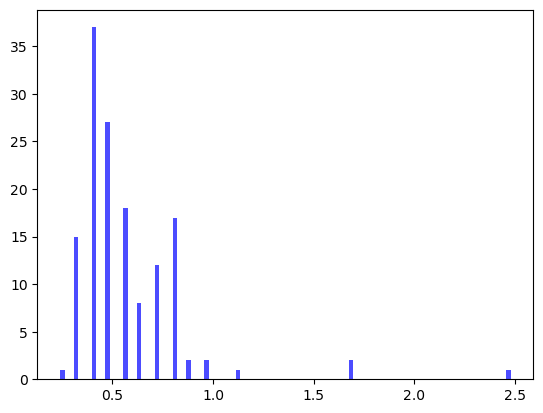

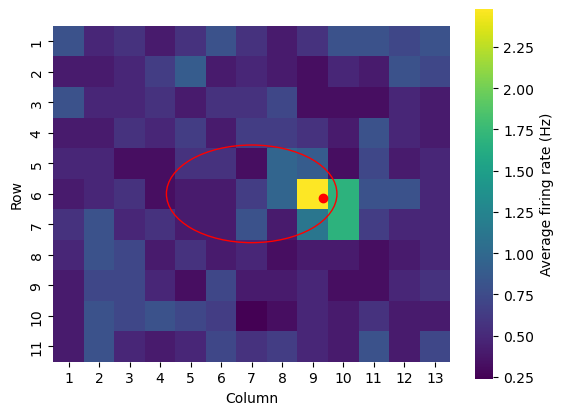

In [41]:
# select the given neuron
v1_neuron = np.copy(v1_sums[:,:,neuron_id])
expected_value = np.median(v1_neuron)

# plot histogram of the neuron
plt.figure()
plt.hist(v1_neuron.flatten(), bins=100, color='b', alpha=0.7)
print("Minimum value:", np.min(v1_neuron))
print('Expected value:', expected_value)

# # set to expected value all the values below a th
th = expected_value - 2*np.std(v1_neuron)
v1_neuron[v1_neuron < th] = expected_value

# plot without gaussian filter
plt.figure()
ax = sns.heatmap(v1_neuron.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)

plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels);
ax.set_yticklabels(ylabels);

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
neuron_pos = neurons_positions[neuron_id]
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

print("threshold", th)


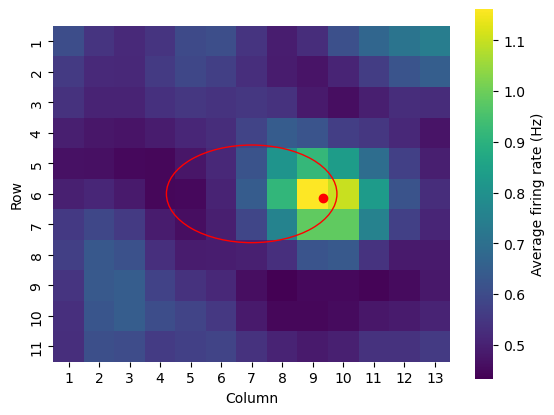

In [42]:
# Apply Gaussian filter
v1_neuron_smooth = scipy.ndimage.gaussian_filter(v1_neuron, sigma=1)

# plot the receptive field as a heatmap
plt.figure()
ax = sns.heatmap(v1_neuron_smooth.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True) 
plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

plt.show()

Center of mass: (9.0, 5.5)
Area: 2
threshold: 1.0391848268557062


/tmp/ipykernel_3798000/3716060860.py:39: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  com = scipy.ndimage.measurements.center_of_mass(v1_neuron_thresholded)


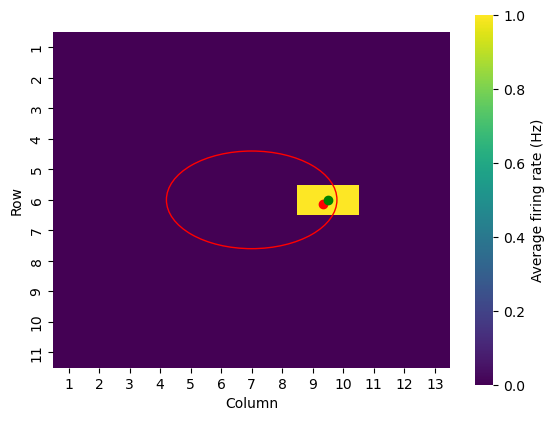

In [43]:
# now apply the threshold at max(RF) – std(RF)
threshold = np.max(v1_neuron_smooth) - np.std(v1_neuron_smooth)
v1_neuron_thresholded = np.zeros(v1_neuron_smooth.shape)
v1_neuron_thresholded[v1_neuron_smooth > threshold] = 1

# plot the thresholded receptive field
plt.figure()
ax = sns.heatmap(v1_neuron_thresholded.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.xlabel('Column')
plt.ylabel('Row')

# Get the current tick locations and labels
xticks, xlabels = plt.xticks()
yticks, ylabels = plt.yticks()

# Convert the labels to integers, add 1, and convert back to string
xlabels = [str(int(label.get_text()) + 1) for label in xlabels]
ylabels = [str(int(label.get_text()) + 1) for label in ylabels]

# Set the new labels
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# obtain the v1 projection ellipse
x_axis = (max(v1_positions_x_core)/1000 * 70/10) - (min(v1_positions_x_core)/1000 * 70/10)
y_axis = (max(v1_positions_z_core)/1000 * 40/10) - (min(v1_positions_z_core)/1000 * 40/10)

# center is at 6,5
center = (6.5,5.5)

# create the ellipse
ellipse = patches.Ellipse(center, width=x_axis, height=y_axis, fill=False, edgecolor='r')
ax.add_patch(ellipse)

# plot the neuron position	
plt.plot(neuron_pos[0], neuron_pos[1], 'ro')

# compute the center of mass of the thresholded RF
com = scipy.ndimage.measurements.center_of_mass(v1_neuron_thresholded)
com = (com[0]+0.5, com[1]+0.5)

# plot the center of mass
plt.plot(com[0],com[1] , 'go')

print('Center of mass:', com)

# compute the area of the receptive field
# def select_connected_component(neuron_thresholded, neuron_pos):
#     neuron_thresholded = skimage.measure.label(neuron_thresholded)
#     coms = scipy.ndimage.measurements.center_of_mass(neuron_thresholded, labels=neuron_thresholded, index=range(1, np.max(neuron_thresholded)+1))
#     coms = [(com[0]+0.5, com[1]+0.5) for com in coms]
#     distances = [np.sqrt((neuron_pos[0]-coms[i][0])**2 + (neuron_pos[1]-coms[i][1])**2) for i in range(len(coms))]
#     neuron_thresholded = neuron_thresholded == np.argmin(distances) + 1

#     return neuron_thresholded

# v1_neuron_thresholded = select_connected_component(v1_neuron_thresholded, neuron_pos)

# select the largest connected component
# compute the area of the thresholded RF
# select the largest connected component
neuron_thresholded = skimage.measure.label(v1_neuron_thresholded)
v1_neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)

area = np.sum(v1_neuron_thresholded)
print('Area:', area)
print('threshold:', threshold)

plt.show()

## Compute receptive field area for all V1 and LM neurons (RUN)

### For only one orientation

In [57]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414

# Define the time bins 250 ms stim len
time_bins = np.array([[450, 700]])
n_timesteps = (time_bins[0,1] - time_bins[0,0])

# load the data
with open('Data_50trials/v1_sums_1or.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_50trials/lm_sums_1or.pkl', 'rb') as f:
    lm_all = pkl.load(f)

with open('Data_disconnected/v1_sums_1or.pkl', 'rb') as f:
    v1_sums_dis = pkl.load(f)

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000
v1_sums_dis = v1_sums_dis / (n_trials * n_timesteps) * 1000

### For 4 stimuli orientation

In [34]:
# define some parameters
n_trials = 50
n_cols = 11 #11
n_rows = 13 #13
n_neurons_v1 = 51978
n_neurons_lm = 7414

# Define the time bins 250 ms stim len
time_bins = np.array([[100, 350], [450, 700], [800, 1050], [1150, 1400]])
n_timesteps = (time_bins[0,1] - time_bins[0,0]) + (time_bins[1,1] - time_bins[1,0]) + (time_bins[2,1] - time_bins[2,0]) + (time_bins[3,1] - time_bins[3,0])

# load the data
with open('Data_50trials/v1_sums.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_50trials/lm_sums.pkl', 'rb') as f:
    lm_all = pkl.load(f)

with open('Data_disconnected/v1_sums.pkl', 'rb') as f:
    v1_sums_dis = pkl.load(f)

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000
v1_sums_dis = v1_sums_dis / (n_trials * n_timesteps) * 1000

In [58]:
# v1_sums[x, y, neuron] 
# lm_all[x, y, neuron]

# First do it for V1
rf_areas_v1 = np.zeros((n_neurons_v1))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums[:,:,neuron] # select the neuron

    # set to expected value all the values below a th
    expected_value = np.median(neuron_rf)
    th = expected_value - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = expected_value

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # apply threshold
    threshold = np.max(neuron_smooth) - np.std(neuron_smooth)
    neuron_thresholded = np.zeros(neuron_smooth.shape)
    neuron_thresholded[neuron_smooth > threshold] = 1

    try:
        # compute the area of the thresholded RF
        # select the largest connected component
        neuron_thresholded = skimage.measure.label(neuron_thresholded)
        neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
        rf_areas_v1[neuron] = np.sum(neuron_thresholded)*100 # multiplied by 100 to get the area in degrees (1 square = 10*10 degrees)
    except:
        rf_areas_v1[neuron] = 0 # if the neuron has no RF, the area is 0

# Now do it for LM
rf_areas_lm = np.zeros((n_neurons_lm))

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf = lm_all[:,:,neuron] # select the neuron

    # set to expected value all the values below a th
    expected_value = np.median(neuron_rf)
    th = expected_value - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = expected_value

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # apply threshold
    threshold = np.max(neuron_smooth) - np.std(neuron_smooth)
    neuron_thresholded = np.zeros(neuron_smooth.shape)
    neuron_thresholded[neuron_smooth > threshold] = 1

    # compute the area of the thresholded RF
    # select the largest connected component
    neuron_thresholded = skimage.measure.label(neuron_thresholded)
    try:
        neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
        rf_areas_lm[neuron] = np.sum(neuron_thresholded)*100 # multiplied by 100 to get the area in degrees (1 square = 10*10 degrees)
    except:
        rf_areas_lm[neuron] = 0

# now for v1 disconnected
rf_areas_v1_dis = np.zeros((n_neurons_v1))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums_dis[:,:,neuron] # select the neuron

    # set to expected value all the values below a th
    expected_value = np.median(neuron_rf)
    th = expected_value - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = expected_value

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # apply threshold
    threshold = np.max(neuron_smooth) - np.std(neuron_smooth)
    neuron_thresholded = np.zeros(neuron_smooth.shape)
    neuron_thresholded[neuron_smooth > threshold] = 1

    try:
        # compute the area of the thresholded RF
        # select the largest connected component
        neuron_thresholded = skimage.measure.label(neuron_thresholded)
        neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
        rf_areas_v1_dis[neuron] = np.sum(neuron_thresholded)*100 # multiplied by 100 to get the area in degrees (1 square = 10*10 degrees)
    except:
        rf_areas_v1_dis[neuron] = 0 # if the neuron has no RF, the area is 0

100%|██████████| 51978/51978 [00:10<00:00, 4884.97it/s]


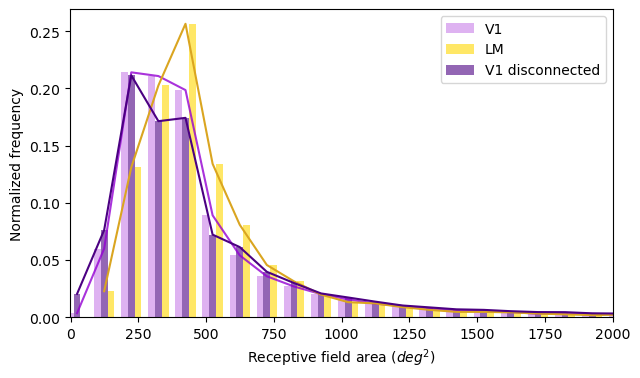

V1 median: 400.0
LM median: 400.0
V1 disconnected median: 400.0

V1 mean: 474.5777059525184
LM mean: 500.72835176692746
V1 disconnected mean: 649.5517334256801

V1 mean within 5th and 95th percentiles: 414.3068038730407
LM mean within 5th and 95th percentiles: 477.41990167825054
V1 disconnected mean within 5th and 95th percentiles: 471.88649856655906


In [59]:
# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_v1, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_lm, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_v1_dis, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (7,4))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Normalized frequency')
plt.xlim(-1, 2000)
plt.legend()
plt.show()

# print the medians
print('V1 median:', np.median(rf_areas_v1))
print('LM median:', np.median(rf_areas_lm))
print('V1 disconnected median:', np.median(rf_areas_v1_dis))

# print the means
print()
print('V1 mean:', np.mean(rf_areas_v1))
print('LM mean:', np.mean(rf_areas_lm))
print('V1 disconnected mean:', np.mean(rf_areas_v1_dis))

# compute 5th and 95th percentiles
q5_v1 = np.percentile(rf_areas_v1, 5)
q95_v1 = np.percentile(rf_areas_v1, 95)
q5_lm = np.percentile(rf_areas_lm, 5)
q95_lm = np.percentile(rf_areas_lm, 95)
q5_v1dis = np.percentile(rf_areas_v1_dis, 5)
q95_v1dis = np.percentile(rf_areas_v1_dis, 95)

# print the mean of the data within the 5th and 95th percentiles
print()
print('V1 mean within 5th and 95th percentiles:', np.mean(rf_areas_v1[(rf_areas_v1 > q5_v1) & (rf_areas_v1 < q95_v1)]))
print('LM mean within 5th and 95th percentiles:', np.mean(rf_areas_lm[(rf_areas_lm > q5_lm) & (rf_areas_lm < q95_lm)]))
print('V1 disconnected mean within 5th and 95th percentiles:', np.mean(rf_areas_v1_dis[(rf_areas_v1_dis > q5_v1dis) & (rf_areas_v1_dis < q95_v1dis)]))

## Compute RF area for LM and V1 neuron by neuron type (RUN)

In [60]:
# Now do it again but selecting only neurons from a given type
# Create the neuron types mask
# obtain the neuron type of each neuron 
new_pop_names = other_billeh_utils.pop_names(networks['v1'], n_selected_neurons=51978, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_v1 = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]
new_pop_names = other_billeh_utils.pop_names(networks['lm'], n_selected_neurons=7414, data_dir='/home/sofiagil/tfm/LM_V1_Billeh_model_sofia/GLIF_network')
cell_types_lm = [other_billeh_utils.pop_name_to_cell_type(pop_name) for pop_name in new_pop_names]

unique_cell_types = list(set(cell_types_v1))
unique_cell_types = sorted(unique_cell_types)

layer_mask_v1_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types_v1] for i in range(len(unique_cell_types))]
layer_mask_lm_types = [[cell_type == unique_cell_types[i] for cell_type in cell_types_lm] for i in range(len(unique_cell_types))]

# Select the neuron type to filter
t = 1
type = unique_cell_types[t]
print("You have selected the type: ", type)

# select the given neuron type receptive field
rf_areas_type_v1 = rf_areas_v1[layer_mask_v1_types[t]]
rf_areas_type_lm = rf_areas_lm[layer_mask_lm_types[t]]
rf_areas_type_v1_dis = rf_areas_v1_dis[layer_mask_v1_types[t]]

You have selected the type:  L2/3 Exc


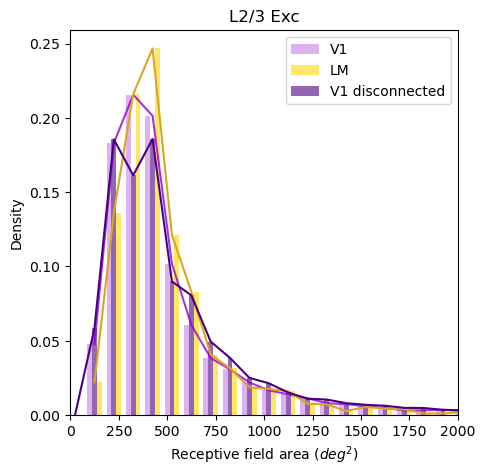

Median V1 RF area: 400.0
Median LM RF area: 400.0
Median V1 disconnected RF area: 400.0

Mean V1 RF area: 503.64882969501144
Mean LM RF area: 501.37665198237886
Mean V1 disconnected RF area: 567.0502009614627

V1 mean within 5th and 95th percentiles: 490.47882339931436
LM mean within 5th and 95th percentiles: 479.67988865692416
V1 disconnected mean within 5th and 95th percentiles: 481.04563579973416


In [61]:
# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_type_v1, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_type_lm, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_type_v1_dis, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (5,5))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Density')
plt.xlim(-1, 2000)
# put neuron type as title
plt.title(type)
plt.legend()
plt.show()

# print the medians
print('Median V1 RF area:', np.median(rf_areas_type_v1))
print('Median LM RF area:', np.median(rf_areas_type_lm))
print('Median V1 disconnected RF area:', np.median(rf_areas_type_v1_dis))

# print the means
print()
print('Mean V1 RF area:', np.mean(rf_areas_type_v1))
print('Mean LM RF area:', np.mean(rf_areas_type_lm))
print('Mean V1 disconnected RF area:', np.mean(rf_areas_type_v1_dis))

# compute 5th and 95th percentiles
q5_v1 = np.percentile(rf_areas_type_v1, 5)
q95_v1 = np.percentile(rf_areas_type_v1, 95)
q5_lm = np.percentile(rf_areas_type_lm, 5)
q95_lm = np.percentile(rf_areas_type_lm, 95)
q5_v1dis = np.percentile(rf_areas_type_v1_dis, 5)
q95_v1dis = np.percentile(rf_areas_type_v1_dis, 95)

# print the mean of the data within the 5th and 95th percentiles
print()
print('V1 mean within 5th and 95th percentiles:', np.mean(rf_areas_type_v1[(rf_areas_type_v1 > q5_v1) & (rf_areas_type_v1 < q95_v1)]))
print('LM mean within 5th and 95th percentiles:', np.mean(rf_areas_type_lm[(rf_areas_type_lm > q5_lm) & (rf_areas_type_lm < q95_lm)]))
print('V1 disconnected mean within 5th and 95th percentiles:', np.mean(rf_areas_type_v1_dis[(rf_areas_type_v1_dis > q5_v1dis) & (rf_areas_type_v1_dis < q95_v1dis)]))

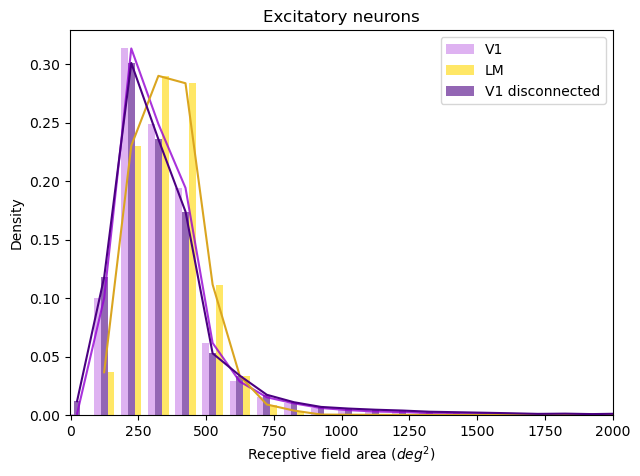

Median V1 RF area: 300.0
Median LM RF area: 300.0
Median V1 disconnected RF area: 300.0

Average V1 RF area inside 0.05 and 0.95 percentiles: 310.6722917800762
Average LM RF area inside 0.05 and 0.95 percentiles: 349.4493081050551
Average V1 disconnected RF area inside 0.05 and 0.95 percentiles: 318.34366420423993

Mean V1 RF area: 328.42558879107713
Mean LM RF area: 337.4149659863946
Mean V1 disconnected RF area: 364.75319168548646


In [39]:
# Now do it for all excitatory neurons together: L2/3 Exc, L4 Exc, L5 Exc, L6 Exc
types = [1, 5, 9, 13]

rf_areas_exc_v1 = np.zeros((0))
rf_areas_exc_lm = np.zeros((0))
rf_areas_exc_v1_dis = np.zeros((0))

for t in types:
    rf_areas_exc_v1 = np.concatenate((rf_areas_exc_v1, rf_areas_v1[layer_mask_v1_types[t]]))
    rf_areas_exc_lm = np.concatenate((rf_areas_exc_lm, rf_areas_lm[layer_mask_lm_types[t]]))
    rf_areas_exc_v1_dis = np.concatenate((rf_areas_exc_v1_dis, rf_areas_v1_dis[layer_mask_v1_types[t]]))

# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_exc_v1, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_exc_lm, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_exc_v1_dis, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (7,5))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Density')
plt.xlim(-1, 2000)
# put neuron type as title
plt.title('Excitatory neurons')
plt.legend()

# compute quartile 1 and 3
q1_v1 = np.percentile(rf_areas_exc_v1, 5)
q3_v1 = np.percentile(rf_areas_exc_v1, 95)
q1_lm = np.percentile(rf_areas_exc_lm, 5)
q3_lm = np.percentile(rf_areas_exc_lm, 95)
q1_v1dis = np.percentile(rf_areas_exc_v1_dis, 5)
q3_v1dis = np.percentile(rf_areas_exc_v1_dis, 95)

# # plot the quartiles
# plt.axvline(q1_v1, color='darkviolet', linestyle='--', label='V1 1st quartile')
# plt.axvline(q3_v1, color='darkviolet', linestyle='--', label='V1 3rd quartile')

# plt.axvline(q1_lm, color='gold', linestyle='--', label='LM 1st quartile')
# plt.axvline(q3_lm, color='gold', linestyle='--', label='LM 3rd quartile')

# plt.axvline(q1_v1dis, color='indigo', linestyle='--', label='V1 disconnected 1st quartile')
# plt.axvline(q3_v1dis, color='indigo', linestyle='--', label='V1 disconnected 3rd quartile')

plt.show()

# print medians
print('Median V1 RF area:', np.median(rf_areas_exc_v1))
print('Median LM RF area:', np.median(rf_areas_exc_lm))
print('Median V1 disconnected RF area:', np.median(rf_areas_exc_v1_dis))

# print average inside the 1st and 3rd quartile
print()
print('Average V1 RF area inside 0.05 and 0.95 percentiles:', np.mean(rf_areas_exc_v1[(rf_areas_exc_v1 > q1_v1) & (rf_areas_exc_v1 < q3_v1)]))
print('Average LM RF area inside 0.05 and 0.95 percentiles:', np.mean(rf_areas_exc_lm[(rf_areas_exc_lm > q1_lm) & (rf_areas_exc_lm < q3_lm)]))
print('Average V1 disconnected RF area inside 0.05 and 0.95 percentiles:', np.mean(rf_areas_exc_v1_dis[(rf_areas_exc_v1_dis > q1_v1dis) & (rf_areas_exc_v1_dis < q3_v1dis)]))

# print the means
print()
print('Mean V1 RF area:', np.mean(rf_areas_exc_v1))
print('Mean LM RF area:', np.mean(rf_areas_exc_lm))
print('Mean V1 disconnected RF area:', np.mean(rf_areas_exc_v1_dis))


## Null model and selection of significant neurons

#### Compute the real chi^2

In [79]:
# First I do it for V1
real_chi2_v1 = np.zeros((n_neurons_v1))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums[:,:,neuron] # select the neuron

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # compute the expected response (grand average)
    expected_response = np.mean(neuron_smooth)

    # compute the chi2
    chi2 = np.sum((neuron_smooth - expected_response)**2 / expected_response)

    real_chi2_v1[neuron] = chi2

# Now do it for LM
real_chi2_lm = np.zeros((n_neurons_lm))

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf = lm_all[:,:,neuron] # select the neuron

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # compute the expected response (grand average)
    expected_response = np.mean(neuron_smooth)

    # compute the chi2
    chi2 = np.sum((neuron_smooth - expected_response)**2 / expected_response)

    real_chi2_lm[neuron] = chi2

 32%|███▏      | 16463/51978 [00:01<00:02, 15110.42it/s]/tmp/ipykernel_2160532/234339457.py:14: RuntimeWarning: invalid value encountered in divide
  chi2 = np.sum((neuron_smooth - expected_response)**2 / expected_response)
  0%|          | 0/7414 [00:00<?, ?it/s]/tmp/ipykernel_2160532/234339457.py:31: RuntimeWarning: invalid value encountered in divide
  chi2 = np.sum((neuron_smooth - expected_response)**2 / expected_response)
100%|██████████| 7414/7414 [00:00<00:00, 15417.31it/s]


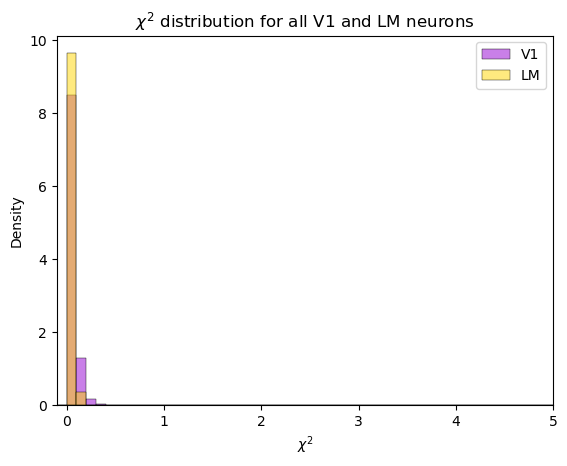

In [80]:
# plot the distribution of chi2 values for V1 and LM (sanity check)
bin_edges = np.arange(-1, 10, 0.1) # change 1 to desired bin size

plt.figure()
n_bins = 50
sns.histplot(real_chi2_v1, bins = bin_edges, color='darkviolet', label='V1', stat='density', alpha=0.5)
sns.histplot(real_chi2_lm, bins = bin_edges, color='gold', label='LM', stat='density', alpha=0.5)

plt.xlabel(r'$\chi^2$')
plt.ylabel('Density')
plt.title(r'$\chi^2$ distribution for all V1 and LM neurons')
plt.xlim([-0.1,5])
plt.legend()
plt.show()

#### Alternative null model 1 neuron visualization

Chi2: 0.35004563845986514
Chi2 suffled: 0.35004563845986514
Chi2 suffled: 0.35004563845986514


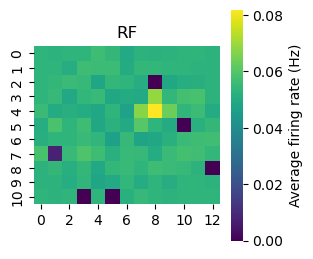

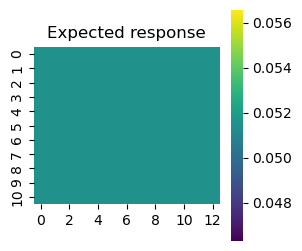

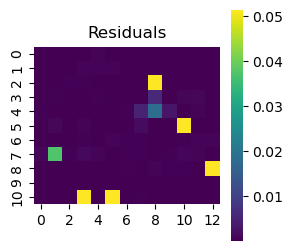

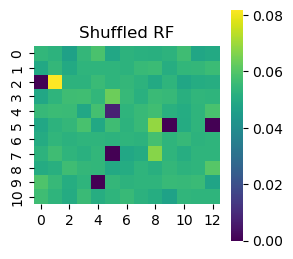

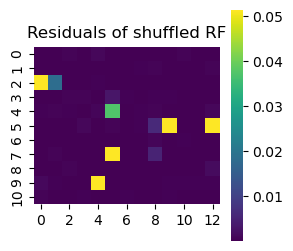

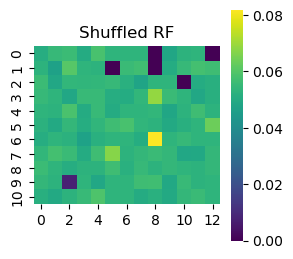

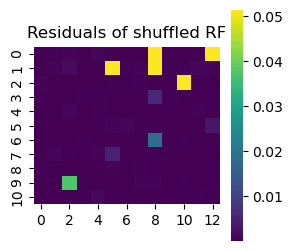

In [81]:
# Compute chi^2 null model for one V1 neuron
neuron_id = 1024

neuron_rf = v1_sums[:,:,neuron_id] # select the neuron

# plot without gaussian filter
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')

# now compute the chi^2
# the expected response: 
expected_response = np.array([np.mean(neuron_rf)]*n_rows*n_cols).reshape(n_rows, n_cols)

# plot the expected response
plt.figure(figsize=(3,3))
ax = sns.heatmap(expected_response.T, cmap='viridis', square = True)
plt.title('Expected response')

expected_response = expected_response[0,0]

# compute residuals
residuals = (neuron_rf - expected_response)**2 / expected_response
# save the maximum residual
max_residual = np.max(residuals)

# plot the residuals
plt.figure(figsize=(3,3))
ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
plt.title('Residuals')

# compute the chi2
chi2 = np.sum(residuals)
print('Chi2:', chi2)

n_shuffles = 2
# now shuffle and recompute chi^2 null
for i in range(n_shuffles):
    rf_flatten = neuron_rf.flatten()
    rf_shuffled = np.random.shuffle(rf_flatten)
    rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

    # plot the shuffled RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(rf_shuffled.T, cmap='viridis', square = True)
    plt.title('Shuffled RF')

    # compute residuals
    residuals = (rf_shuffled - expected_response)**2 / expected_response

    # plot the residuals
    plt.figure(figsize=(3,3))
    ax = sns.heatmap(residuals.T, cmap='viridis', square = True, vmax = max_residual)
    plt.title('Residuals of shuffled RF')

    # compute the chi2
    chi2 = np.sum(residuals)
    print('Chi2 suffled:', chi2)



#### 2nd alternative null model version visualization for 1 neuron

Tests where it can be seen that this null model makes more sense
- 8: accepted here, discarded with the other
- 1: discarded here, accepted with the other
- 1001: discarded here, accepted with the other

Size real largest component: 56
P-value: 0.0
Mean of the null model: 35.0


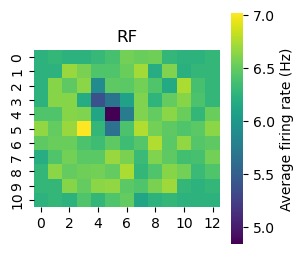

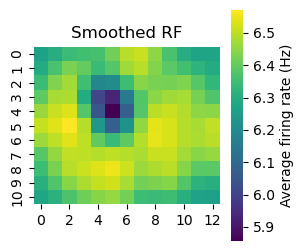

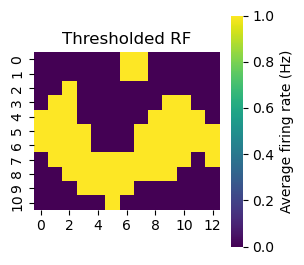

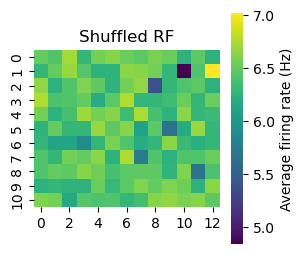

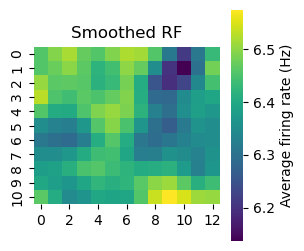

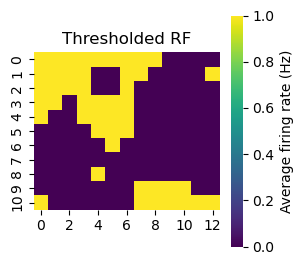

In [189]:
# Compute chi^2 null model for one V1 neuron
neuron_id = 1031

neuron_rf_ = v1_sums_dis[:,:,neuron_id] # select the neuron
# copy the RF
neuron_rf = neuron_rf_.copy()

# set to median all the values below a th
expected_value = np.median(neuron_rf)
th = expected_value - 2*np.std(neuron_rf)
neuron_rf[neuron_rf < th] = expected_value

# plot without gaussian filter
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')

# apply gaussian filter
neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)
# plot the smoothed RF
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_smooth.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('Smoothed RF')

# apply threshold
threshold = np.max(neuron_smooth) - np.std(neuron_smooth)
neuron_thresholded = np.zeros(neuron_smooth.shape)
neuron_thresholded[neuron_smooth > threshold] = 1

# plot the thresholded RF
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_thresholded.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('Thresholded RF')

# now count the size of the largest component
neuron_thresholded = skimage.measure.label(neuron_thresholded)
neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
real_area = np.sum(neuron_thresholded)
print('Size real largest component:', real_area)

# now the null model consists on reshuffling and recompute the size of the largest component 
n_shuffles = 1
null_areas = []
for i in range(n_shuffles):
    rf_flatten = neuron_rf.flatten()
    rf_shuffled = np.random.shuffle(rf_flatten)
    rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

    # plot the shuffled RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(rf_shuffled.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
    plt.title('Shuffled RF')

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(rf_shuffled, sigma=1)
    # plot the smoothed RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(neuron_smooth.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
    plt.title('Smoothed RF')

    # apply threshold
    # dont compute the threshold again, use the one from the original RF
    neuron_thresholded = np.zeros(neuron_smooth.shape)
    neuron_thresholded[neuron_smooth > threshold] = 1

    # plot the thresholded RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(neuron_thresholded.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
    plt.title('Thresholded RF')

    # now count the size of the largest component
    neuron_thresholded = skimage.measure.label(neuron_thresholded)
    try:
        neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
        area = np.sum(neuron_thresholded)
    except:
        area = 0

    null_areas.append(area)

    # print('Size shuffled largest component:', area)

#  compute p-value
p_value = np.sum(np.array(null_areas) > real_area) / n_shuffles
print('P-value:', p_value)

# print the mean of the null model
print('Mean of the null model:', np.mean(null_areas))

P-value: 0.0


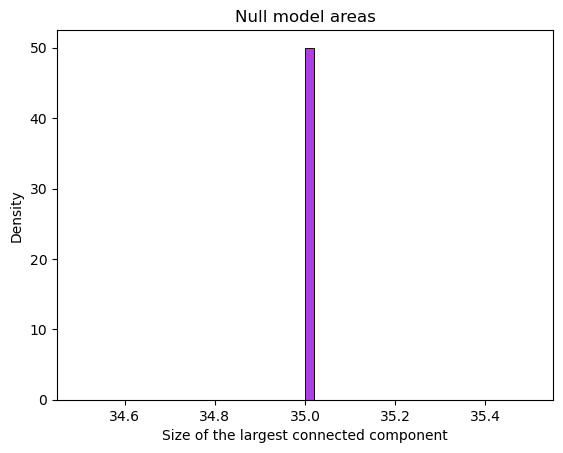

In [191]:
# function to implement implement it
def compute_pval(neuron_rf, n_null_models):
    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # apply threshold
    threshold = np.max(neuron_smooth) - np.std(neuron_smooth)
    neuron_thresholded = np.zeros(neuron_smooth.shape)
    neuron_thresholded[neuron_smooth > threshold] = 1

    # now count the size of the largest component
    neuron_thresholded = skimage.measure.label(neuron_thresholded)
    try:
        neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
        real_area = np.sum(neuron_thresholded)
    except:
        real_area = 0
    
    n_rows, n_cols = neuron_rf.shape

    null_areas = []
    for i in range(n_null_models):
        rf_flatten = neuron_rf.flatten()
        rf_shuffled = np.random.shuffle(rf_flatten)
        rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

        # apply gaussian filter
        neuron_smooth = scipy.ndimage.gaussian_filter(rf_shuffled, sigma=1)

        # apply threshold
        # dont compute the threshold again, use the one from the original RF
        neuron_thresholded = np.zeros(neuron_smooth.shape)
        neuron_thresholded[neuron_smooth > threshold] = 1

        # now count the size of the largest component
        neuron_thresholded = skimage.measure.label(neuron_thresholded)
        try:
            neuron_thresholded = (neuron_thresholded == np.argmax(np.bincount(neuron_thresholded.flat)[1:]) + 1)
            area = np.sum(neuron_thresholded)
        except:
            area = 0

        null_areas.append(area)

    #  compute p-value
    p_value = np.sum(np.array(null_areas) > real_area) / n_null_models

    return p_value

# test the function
neuron_id = 1031
neuron_rf_ = v1_sums_dis[:,:,neuron_id] # select the neuron
# copy the RF
neuron_rf = neuron_rf_.copy()

# set to median all the values below a th
expected_value = np.median(neuron_rf)
th = expected_value - 2*np.std(neuron_rf)
neuron_rf[neuron_rf < th] = expected_value

p_value = compute_pval(neuron_rf, 5000)
print('P-value:', p_value)

# make a histogram of null model areas
plt.figure()
sns.histplot(null_areas, bins = 50, color='darkviolet', stat='density')
plt.xlabel('Size of the largest connected component')
plt.ylabel('Density')
plt.title('Null model areas')
plt.show()

#### Null model for 1 neuron visualization

Chi2: 0.03484133710407663
Chi2 suffled: 0.014888731539751125
Chi2 suffled: 0.020677507521896635


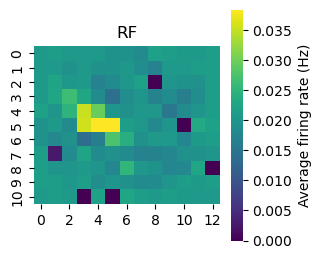

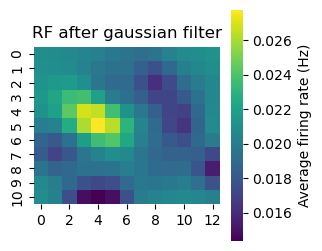

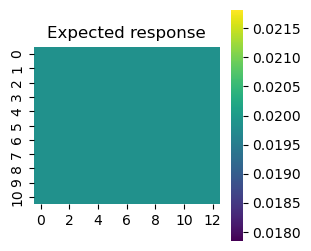

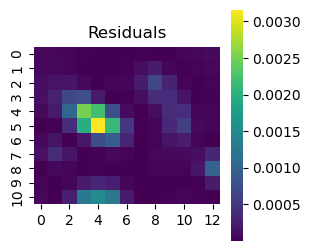

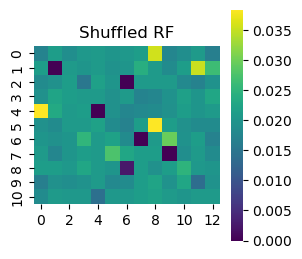

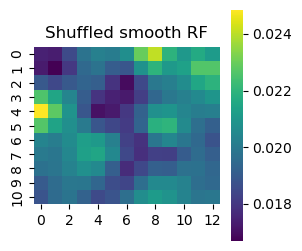

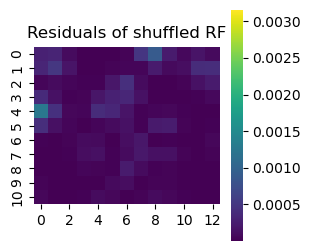

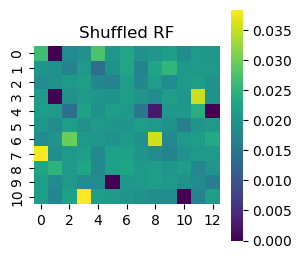

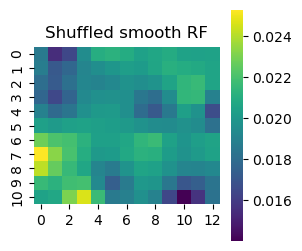

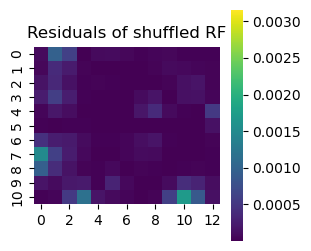

In [88]:
# Compute chi^2 null model for one V1 neuron
neuron_id = 10027

v1_neuron = v1_sums[:,:,neuron_id]
neuron_rf = v1_neuron

# plot without gaussian filter
plt.figure(figsize =(3,3))
ax = sns.heatmap(v1_neuron.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')

# apply gaussian filter
neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

# plot the heatmap
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_smooth.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True) 
plt.title('RF after gaussian filter')

# now compute the chi^2
# the expected response: 
expected_response = np.array([np.mean(neuron_smooth)]*n_rows*n_cols).reshape(n_rows, n_cols)

# plot the expected response
plt.figure(figsize=(3,3))
ax = sns.heatmap(expected_response.T, cmap='viridis', square = True)
plt.title('Expected response')

expected_response = expected_response[0,0]

# compute residuals
residuals = (neuron_smooth - expected_response)**2 / expected_response
# save the maximum residual
max_residual = np.max(residuals)

# plot the residuals
plt.figure(figsize=(3,3))
ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
plt.title('Residuals')

# compute the chi2
chi2 = np.sum(residuals)
print('Chi2:', chi2)

# Now compute the same by shuffling RF, to obtain a null model
n_shuffles = 2

for i in range(n_shuffles):
    rf_flatten = neuron_rf.flatten()
    rf_shuffled = np.random.shuffle(rf_flatten)
    rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

    # plot the shuffled RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(rf_shuffled.T, cmap='viridis', square = True)
    plt.title('Shuffled RF')

    # apply gaussian filter
    rf_shuffled = scipy.ndimage.gaussian_filter(rf_shuffled, sigma=1)


    # plot the shuffled RF
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(rf_shuffled.T, cmap='viridis', square = True)
    plt.title('Shuffled smooth RF')

    # compute residuals
    residuals = (rf_shuffled - expected_response)**2 / expected_response

    # plot the residuals
    plt.figure(figsize=(3,3))
    ax = sns.heatmap(residuals.T, cmap='viridis', square = True, vmax = max_residual)
    plt.title('Residuals of shuffled RF')

    # compute the chi2
    chi2 = np.sum(residuals)
    print('Chi2 suffled:', chi2)



#### Null model for all neurons

In [384]:
# First for V1
n_null_models = 1000
null_chi2_v1 = np.zeros((n_neurons_v1, n_null_models))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums[:,:,neuron] # select the neuron

    # set to expected value all the values below a th
    expected_value = np.mean(neuron_rf)
    th = expected_value - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = expected_value

    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # compute expected response
    expected_response = np.mean(neuron_smooth)

    for i in range(n_null_models):
        # shuffle the RF
        rf_flatten = neuron_rf.flatten()
        rf_shuffled = np.random.shuffle(rf_flatten)
        rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

        # apply gaussian filter
        rf_shuffled = scipy.ndimage.gaussian_filter(rf_shuffled, sigma=1)

        # compute residuals
        residuals = (rf_shuffled - expected_response)**2 / expected_response

        # compute the chi2
        chi2 = np.sum(residuals)
        null_chi2_v1[neuron, i] = chi2
    
# save the data
# with open('Data_50trials/null_chi2_v1.pkl', 'wb') as f:
#     pkl.dump(null_chi2_v1, f)

with open('Data_disconnected/null_chi2_v1.pkl', 'wb') as f:
    pkl.dump(null_chi2_v1, f)

# Now for LM
null_chi2_lm = np.zeros((n_neurons_lm, n_null_models))

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf = lm_all[:,:,neuron] # select the neuron

    # set to expected value all the values below a th
    expected_value = np.mean(neuron_rf)
    th = expected_value - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = expected_value
    
    # apply gaussian filter
    neuron_smooth = scipy.ndimage.gaussian_filter(neuron_rf, sigma=1)

    # compute expected response
    expected_response = np.mean(neuron_smooth)

    for i in range(n_null_models):
        # shuffle the RF
        rf_flatten = neuron_rf.flatten()
        rf_shuffled = np.random.shuffle(rf_flatten)
        rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

        # apply gaussian filter
        rf_shuffled = scipy.ndimage.gaussian_filter(rf_shuffled, sigma=1)

        # compute residuals
        residuals = (rf_shuffled - expected_response)**2 / expected_response

        # compute the chi2
        chi2 = np.sum(residuals)
        null_chi2_lm[neuron, i] = chi2

# save the data
# with open('Data_50trials/null_chi2_lm.pkl', 'wb') as f:
#     pkl.dump(null_chi2_lm, f)

with open('Data_disconnected/null_chi2_lm.pkl', 'wb') as f:
    pkl.dump(null_chi2_lm, f)


 34%|███▍      | 17646/51978 [17:12<33:29, 17.09it/s]  


KeyboardInterrupt: 

#### My null model for all neurons


In [412]:
n_null_models = 1000
p_values_v1 = np.zeros(n_neurons_v1)

for neuron in tqdm(range(n_neurons_v1)):
    
    # neuron_rf = v1_sums[:,:,neuron] # select the neuron
    neuron_rf = v1_sums_dis[:,:,neuron]

    p_value = compute_pval(neuron_rf, n_null_models)
    
    p_values_v1[neuron] = p_value

# save the data
# with open('Data_50trials/p_values_v1_mynull.pkl', 'wb') as f:
#     pkl.dump(p_values_v1, f)

with open('Data_disconnected/p_values_v1_mynull_new.pkl', 'wb') as f:
    pkl.dump(p_values_v1, f)

# Now for LM
p_values_lm = np.zeros(n_neurons_lm)

for neuron in tqdm(range(n_neurons_lm)):
        
        # neuron_rf = lm_all[:,:,neuron] # select the neuron
        neuron_rf = lm_all_dis[:,:,neuron]

        p_value = compute_pval(neuron_rf, n_null_models)
        
        p_values_lm[neuron] = p_value

# save the data
# with open('Data_50trials/p_values_lm_mynull.pkl', 'wb') as f:
#     pkl.dump(p_values_lm, f)

with open('Data_disconnected/p_values_lm_mynull_new.pkl', 'wb') as f:
    pkl.dump(p_values_lm, f)

  0%|          | 165/51978 [00:06<34:39, 24.91it/s] 


KeyboardInterrupt: 

In [18]:
#load pvalues and visualize them
# with open('Data_50trials/p_values_v1_mynull_new.pkl', 'rb') as f:
#     p_values_v1 = pkl.load(f)

# with open('Data_50trials/p_values_lm_mynull_new.pkl', 'rb') as f:
#     p_values_lm = pkl.load(f)

# with open('Data_disconnected/p_values_v1_mynull_new.pkl', 'rb') as f:
#     p_values_v1_dis = pkl.load(f)

with open('Data_50trials/p_values_v1_mynull.pkl', 'rb') as f:
    p_values_v1 = pkl.load(f)

with open('Data_50trials/p_values_lm_mynull.pkl', 'rb') as f:
    p_values_lm = pkl.load(f)

with open('Data_disconnected/p_values_v1_mynull.pkl', 'rb') as f:
    p_values_v1_dis = pkl.load(f)

# compute the percentage of neurons with p-value < 0.05
percentage_v1 = np.sum(p_values_v1 < 0.05) / n_neurons_v1
percentage_lm = np.sum(p_values_lm < 0.05) / n_neurons_lm
percentage_v1dis = np.sum(p_values_v1_dis < 0.05) / n_neurons_v1

print('Percentage of V1 neurons with p-value < 0.05:', percentage_v1)
print('Percentage of LM neurons with p-value < 0.05:', percentage_lm)
print('Percentage of V1 disconnected neurons with p-value < 0.05:', percentage_v1dis)

# compute the percentage of neurons with p-value < 0.01
percentage_v1 = np.sum(p_values_v1 < 0.01) / n_neurons_v1
percentage_lm = np.sum(p_values_lm < 0.01) / n_neurons_lm
percentage_v1dis = np.sum(p_values_v1_dis < 0.01) / n_neurons_v1

print()
print('Percentage of V1 neurons with p-value < 0.01:', percentage_v1)
print('Percentage of LM neurons with p-value < 0.01:', percentage_lm)
print('Percentage of V1 disconnected neurons with p-value < 0.01:', percentage_v1dis)

Percentage of V1 neurons with p-value < 0.05: 0.7115895186425026
Percentage of LM neurons with p-value < 0.05: 0.9665497707040733
Percentage of V1 disconnected neurons with p-value < 0.05: 0.6094693908961484

Percentage of V1 neurons with p-value < 0.01: 0.506906768248105
Percentage of LM neurons with p-value < 0.01: 0.8957377933639061
Percentage of V1 disconnected neurons with p-value < 0.01: 0.4672938550925392


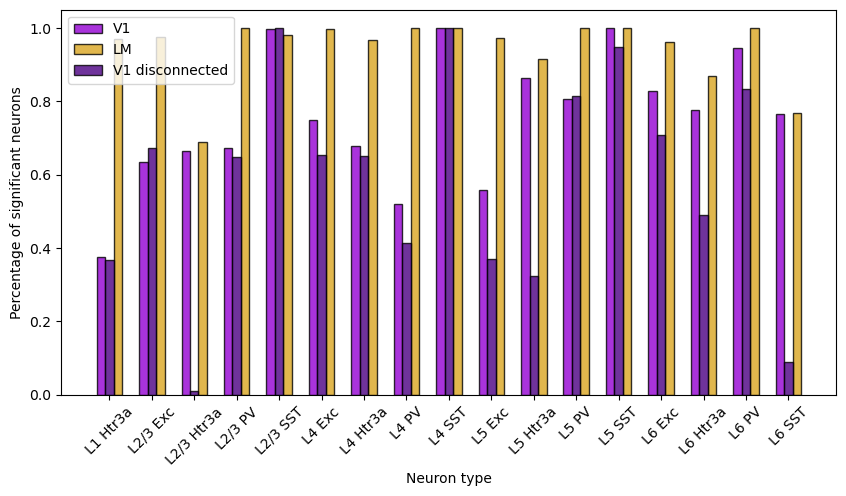

In [19]:
# Selection of significant neurons (p-value<p_value_th)
p_value_th = 0.05
significant_neurons_v1 = np.where(p_values_v1 < p_value_th)[0]
significant_neurons_lm = np.where(p_values_lm < p_value_th)[0]
significant_neurons_v1_dis = np.where(p_values_v1_dis < p_value_th)[0]

# apply the masks to v1_sums[col, row, neuron] and lm_all[col, row, neuron]
significant_v1_sums = v1_sums[:,:,significant_neurons_v1]
significant_lm_all = lm_all[:,:,significant_neurons_lm]
significant_v1_sums_dis = v1_sums_dis[:,:,significant_neurons_v1_dis]

# apply it also to the neuron types
significant_cell_types_v1 = [cell_types_v1[neuron] for neuron in significant_neurons_v1]
significant_cell_types_lm = [cell_types_lm[neuron] for neuron in significant_neurons_lm]
significant_cell_types_v1_dis = [cell_types_v1[neuron] for neuron in significant_neurons_v1_dis]

# compute the percentage of significant neurons in each neuron type
percentage_v1 = np.zeros(len(unique_cell_types))
percentage_lm = np.zeros(len(unique_cell_types))
percentage_v1dis = np.zeros(len(unique_cell_types))

for type in unique_cell_types:
    # count number of type in cell_types_v1
    n_type_v1 = cell_types_v1.count(type)
    n_type_lm = cell_types_lm.count(type)
    n_type_v1dis = cell_types_v1.count(type)

    # count number of type in significant_cell_types_v1
    n_type_significant_v1 = significant_cell_types_v1.count(type)
    n_type_significant_lm = significant_cell_types_lm.count(type)
    n_type_significant_v1dis = significant_cell_types_v1_dis.count(type)

    # compute the percentage
    percentage_v1[unique_cell_types.index(type)] = n_type_significant_v1 / n_type_v1
    percentage_lm[unique_cell_types.index(type)] = n_type_significant_lm / n_type_lm
    percentage_v1dis[unique_cell_types.index(type)] = n_type_significant_v1dis / n_type_v1dis


# plot the percentage of significant neurons in each neuron type
plt.figure(figsize = (10,5))
bar_width = 0.2  # Define the width of the bars
x = np.arange(len(unique_cell_types))  # Define the x-coordinates of the bars

plt.bar(x - bar_width, percentage_v1, bar_width, color='darkviolet', label='V1', alpha=0.8, edgecolor='black')
plt.bar(x + bar_width, percentage_lm, bar_width, color='goldenrod', label='LM', alpha=0.8, edgecolor='black')
plt.bar(x, percentage_v1dis, bar_width, color='indigo', label='V1 disconnected', alpha=0.8, edgecolor='black')

plt.xticks(x, unique_cell_types, rotation=45)   # Set the x-ticks to the middle of the bars
plt.xlabel('Neuron type')
plt.ylabel('Percentage of significant neurons')
plt.legend()
plt.show()

#### Fast testing of individual p-values

In [36]:
# load the data for the null model
with open('Data_50trials/null_chi2_v1.pkl', 'rb') as f:
    null_chi2_v1 = pkl.load(f)

with open('Data_50trials/null_chi2_lm.pkl', 'rb') as f:
    null_chi2_lm = pkl.load(f)

Real chi2: 0.2559186202105435
Null chi2: 0.13668190950299214
P-value: 0.01


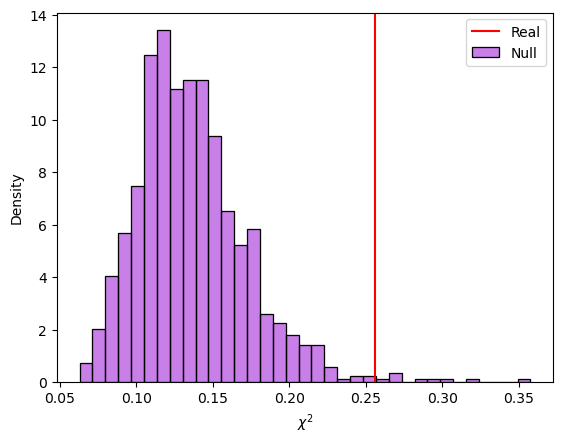

In [37]:
# print values of real and null chi^2 for given neuron
idx = 1001
print('Real chi2:', real_chi2_v1[idx])
print('Null chi2:', np.mean(null_chi2_v1[idx,:]))

# compute the p-value as the percentage of null chi2 values that are greater than the real chi2
p_value = np.sum(null_chi2_v1[idx,:] > real_chi2_v1[idx]) / n_null_models
print('P-value:', p_value)

# plot the distribution and the real value
plt.figure()
sns.histplot(null_chi2_v1[idx,:], color='darkviolet', label='Null', stat='density', alpha=0.5)
plt.axvline(real_chi2_v1[idx], color='red', label='Real')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Small test on matrix shuffling

In [110]:
matrix = np.array([[0,1,0],[5,4,1],[6,5,1]])
print(matrix, "\n")

# shuffle the matrix
matrix_shuffled = sklearn.utils.shuffle(matrix, random_state=0)
print(matrix_shuffled, "\n")

# shuffle the matrix along both axis
matrix_flattened = matrix.flatten()
matrix_flattened_shuffled = sklearn.utils.shuffle(matrix_flattened, random_state=0)
matrix_shuffled = matrix_flattened_shuffled.reshape(matrix.shape)
print(matrix_shuffled, "\n")

# shuffle the matrix along both axis with numpy
matrix_flattened = matrix.flatten()
np.random.shuffle(matrix_flattened)
matrix_shuffled = matrix_flattened.reshape(matrix.shape)
print(matrix_shuffled, "\n")

[[0 1 0]
 [5 4 1]
 [6 5 1]] 

[[6 5 1]
 [5 4 1]
 [0 1 0]] 

[[5 0 1]
 [4 1 6]
 [5 0 1]] 

[[4 1 0]
 [0 5 1]
 [1 5 6]] 



#### p-values computation for all V1 and LM neurons and selection of significant neurons

100%|██████████| 7414/7414 [00:00<00:00, 152570.28it/s]


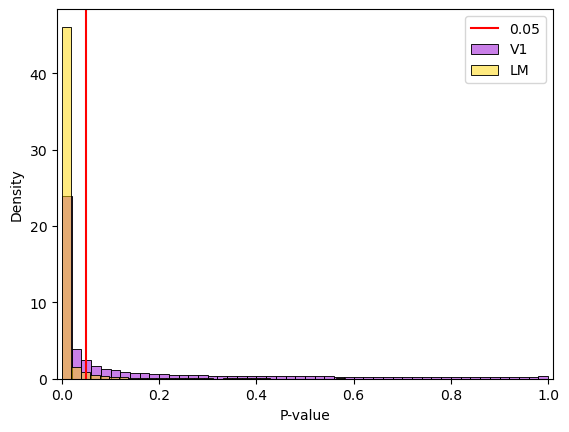

Percentage of V1 neurons with p-value < 0.05: 0.5840932702297126
Percentage of LM neurons with p-value < 0.05: 0.9386296196385218

 Percentage of V1 neurons with p-value < 0.01: 0.40267036053715033
Percentage of LM neurons with p-value < 0.01: 0.859185325060696


In [38]:
# compute the p-values for all neurons in V1 as the percentage of null chi2 values that are greater than the real chi2
p_values_v1 = np.zeros(n_neurons_v1)

for neuron in tqdm(range(n_neurons_v1)):
    p_values_v1[neuron] = np.sum(null_chi2_v1[neuron,:] > real_chi2_v1[neuron]) / n_null_models

# compute the p-values for all neurons in LM as the percentage of null chi2 values that are greater than the real chi2
p_values_lm = np.zeros(n_neurons_lm)

for neuron in tqdm(range(n_neurons_lm)):
    p_values_lm[neuron] = np.sum(null_chi2_lm[neuron,:] > real_chi2_lm[neuron]) / n_null_models

# plot the p-values distribution and draw a line at 0.05
plt.figure()
n_bins = 50
sns.histplot(p_values_v1,bins = n_bins, color='darkviolet', label='V1', stat='density', alpha=0.5)
sns.histplot(p_values_lm,bins = n_bins, color='gold', label='LM', stat='density', alpha=0.5)
plt.axvline(0.05, color='red', label='0.05')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.xlim([-0.01,1.01])
plt.legend()
plt.show()

# compute the percentage of neurons with p-value < 0.05
percentage_v1 = np.sum(p_values_v1 < 0.05) / n_neurons_v1
percentage_lm = np.sum(p_values_lm < 0.05) / n_neurons_lm

print('Percentage of V1 neurons with p-value < 0.05:', percentage_v1)
print('Percentage of LM neurons with p-value < 0.05:', percentage_lm)

# compute the percentage of neurons with p-value < 0.01
percentage_v1 = np.sum(p_values_v1 < 0.01) / n_neurons_v1
percentage_lm = np.sum(p_values_lm < 0.01) / n_neurons_lm

print('\n Percentage of V1 neurons with p-value < 0.01:', percentage_v1)
print('Percentage of LM neurons with p-value < 0.01:', percentage_lm)

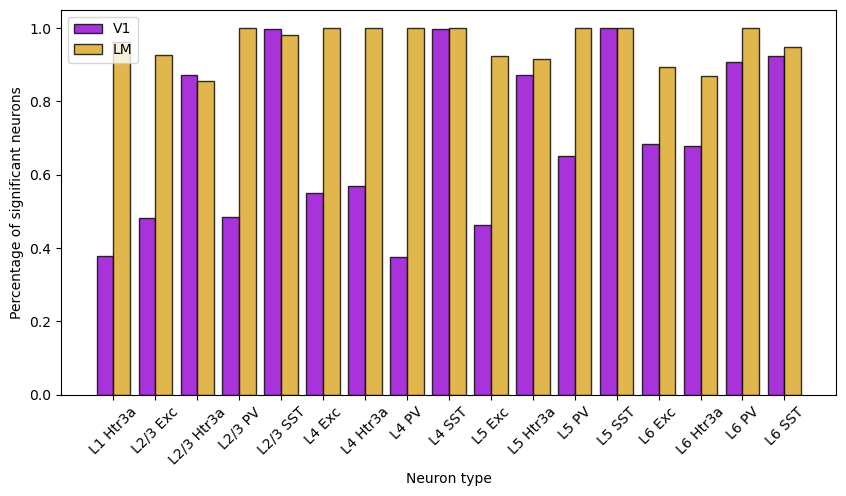

In [42]:
# Selection of significant neurons (p-value<p_value_th)
p_value_th = 0.05
significant_neurons_v1 = np.where(p_values_v1 < p_value_th)[0]
significant_neurons_lm = np.where(p_values_lm < p_value_th)[0]

# apply the masks to v1_sums[col, row, neuron] and lm_all[col, row, neuron]
significant_v1_sums = v1_sums[:,:,significant_neurons_v1]
significant_lm_all = lm_all[:,:,significant_neurons_lm]

# apply it also to the neuron types
significant_cell_types_v1 = [cell_types_v1[neuron] for neuron in significant_neurons_v1]
significant_cell_types_lm = [cell_types_lm[neuron] for neuron in significant_neurons_lm]

# compute the percentage of significant neurons in each neuron type
percentage_v1 = np.zeros(len(unique_cell_types))
percentage_lm = np.zeros(len(unique_cell_types))

for type in unique_cell_types:
    # count number of type in cell_types_v1
    n_type_v1 = cell_types_v1.count(type)
    n_type_lm = cell_types_lm.count(type)

    # count number of type in significant_cell_types_v1
    n_type_significant_v1 = significant_cell_types_v1.count(type)
    n_type_significant_lm = significant_cell_types_lm.count(type)

    # compute the percentage
    percentage_v1[unique_cell_types.index(type)] = n_type_significant_v1 / n_type_v1
    percentage_lm[unique_cell_types.index(type)] = n_type_significant_lm / n_type_lm


# plot the percentage of significant neurons in each neuron type
plt.figure(figsize = (10,5))
bar_width = 0.4  # Define the width of the bars
x = np.arange(len(unique_cell_types))  # Define the x-coordinates of the bars

plt.bar(x - bar_width/2, percentage_v1, bar_width, color='darkviolet', label='V1', alpha=0.8, edgecolor='black')
plt.bar(x + bar_width/2, percentage_lm, bar_width, color='goldenrod', label='LM', alpha=0.8, edgecolor='black')

plt.xticks(x, unique_cell_types, rotation=45)   # Set the x-ticks to the middle of the bars
plt.xlabel('Neuron type')
plt.ylabel('Percentage of significant neurons')
plt.legend()
plt.show()

### Final null model (trial-wise shuffling)

In [29]:
# Load the data
with open('Data_50trials/v1_sums_trials.pkl', 'rb') as f:
    v1_sums_trials = pkl.load(f)

with open('Data_50trials/lm_sums_trials.pkl', 'rb') as f:
    lm_all_trials = pkl.load(f)

with open('Data_50trials/lm_sums.pkl', 'rb') as f:
    lm_all = pkl.load(f)

with open('Data_50trials/v1_sums.pkl', 'rb') as f:
    v1_sums = pkl.load(f)

with open('Data_disconnected/v1_sums.pkl', 'rb') as f:
    v1_sums_dis = pkl.load(f)

with open('Data_disconnected/v1_sums_trials.pkl', 'rb') as f:
    v1_sums_trials_dis = pkl.load(f)

# normalize v1 with the number of trials and time bins to get an average firing rate per neuron, multiply by 1000 to get Hz
v1_sums = v1_sums / (n_trials * n_timesteps) * 1000
lm_all = lm_all / (n_trials * n_timesteps) * 1000
v1_sums_dis = v1_sums_dis / (n_trials * n_timesteps) * 1000

v1_sums_trials = v1_sums_trials / (n_timesteps) * 1000
lm_all_trials = lm_all_trials / (n_timesteps) * 1000
v1_sums_trials_dis = v1_sums_trials_dis / (n_timesteps) * 1000

#### Visualization for 1 neuron

6.050762837912342
Chi2: 0.5471903323262841
Chi2 shuffled: 0.32499575767860145


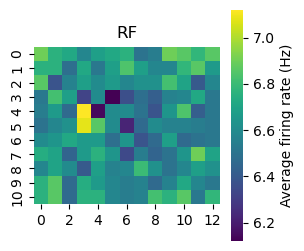

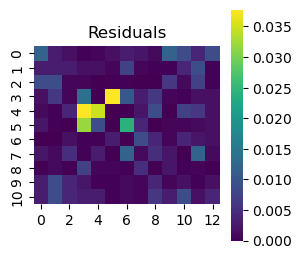

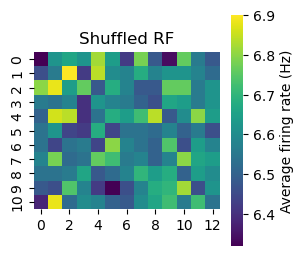

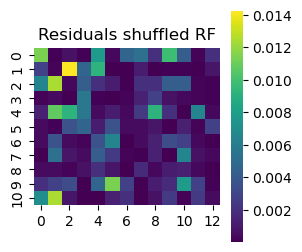

In [140]:
neuron_id = 1031 # try 190 for a discarding example

neuron_rf = v1_sums[:,:,neuron_id] # select the neuron
neuron_rf_trials = v1_sums_trials[:,:,:,neuron_id] # select the neuron

# set to median all the values below a th
median = np.median(neuron_rf)
th = median - 2*np.std(neuron_rf)
neuron_rf[neuron_rf < th] = median

print(th)

# plot without gaussian filter
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')

# compute expected value
expected_value = np.mean(neuron_rf)
# compute residuals
residuals = (neuron_rf - expected_value)**2 / expected_value

# plot the residuals
plt.figure(figsize=(3,3))
ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
plt.title('Residuals')

# compute chi^2
chi2 = np.sum(residuals)
print('Chi2:', chi2)

# now compute RF shuffling every position in each trial and then computing the average over trials
n_shuffles = 1

for i in range(n_shuffles):
    # create a matrix to store the shuffled RFs
    shuffled_rf = np.zeros((n_rows, n_cols))

    for trial in range(n_trials):
        # shuffle the RF
        rf_flatten = neuron_rf_trials[:,:,trial].flatten()
        rf_shuffled = np.random.shuffle(rf_flatten)
        rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

        # add the shuffled RF to the matrix
        shuffled_rf += rf_shuffled

    # average over trials
    shuffled_rf /= n_trials

    # set to the median all the values below a th
    median = np.median(shuffled_rf)
    th = median - 2*np.std(shuffled_rf)
    shuffled_rf[shuffled_rf < th] = median

    # plot the shuffled RFs
    plt.figure(figsize =(3,3))
    ax = sns.heatmap(shuffled_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
    plt.title('Shuffled RF')

    # compute the expected value
    expected_value = np.mean(shuffled_rf)
    # compute residuals
    residuals = (shuffled_rf - expected_value)**2 / expected_value

    # plot the residuals
    plt.figure(figsize=(3,3))
    ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
    plt.title('Residuals shuffled RF')

    # compute chi^2
    chi2_null = np.sum(residuals)
    print('Chi2 shuffled:', chi2_null)


#### For all neurons

In [118]:
n_null_models = 1000
null_chi2_v1 = np.zeros((n_neurons_v1, n_null_models))
real_chi2_v1 = np.zeros((n_neurons_v1))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums[:,:,neuron] # select the neuron
    neuron_rf_trials = v1_sums_trials[:,:,:,neuron] # select the neuron

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute expected value
    expected_value = np.mean(neuron_rf)
    # compute residuals
    residuals = (neuron_rf - expected_value)**2 / expected_value

    # compute chi^2
    chi2 = np.sum(residuals)
    real_chi2_v1[neuron] = chi2

    # null model
    for k in range(n_null_models):
        # create a matrix to store the shuffled RFs
        shuffled_rf = np.zeros((n_rows, n_cols))

        for trial in range(n_trials):
            # shuffle the RF
            rf_flatten = neuron_rf_trials[:,:,trial].flatten()
            rf_shuffled = np.random.shuffle(rf_flatten)
            rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

            # add the shuffled RF to the matrix
            shuffled_rf += rf_shuffled

        # average over trials
        shuffled_rf /= n_trials

        # set to the median all the values below a th
        median = np.median(shuffled_rf)
        th = median - 2*np.std(shuffled_rf)
        shuffled_rf[shuffled_rf < th] = median

        # compute the expected value
        expected_value = np.mean(shuffled_rf)
        # compute residuals
        residuals = (shuffled_rf - expected_value)**2 / expected_value

        # compute chi^2
        chi2_null = np.sum(residuals)
        null_chi2_v1[neuron, k] = chi2_null

# save the data
with open('Data_50trials/null_chi2_v1_trials.pkl', 'wb') as f:
    pkl.dump(null_chi2_v1, f)

with open('Data_50trials/real_chi2_v1_trials.pkl', 'wb') as f:
    pkl.dump(real_chi2_v1, f)

  2%|▏         | 980/51978 [07:21<6:23:12,  2.22it/s] 


KeyboardInterrupt: 

In [116]:
n_null_models = 1000
# now for LM
null_chi2_lm = np.zeros((n_neurons_lm, n_null_models))
real_chi2_lm = np.zeros((n_neurons_lm))

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf = lm_all[:,:,neuron] # select the neuron
    neuron_rf_trials = lm_all_trials[:,:,:,neuron] # select the neuron

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute expected value
    expected_value = np.mean(neuron_rf)
    # compute residuals
    residuals = (neuron_rf - expected_value)**2 / expected_value

    # compute chi^2
    chi2 = np.sum(residuals)
    real_chi2_lm[neuron] = chi2

    # null model
    for k in range(n_null_models):
        # create a matrix to store the shuffled RFs
        shuffled_rf = np.zeros((n_rows, n_cols))

        for trial in range(n_trials):
            # shuffle the RF
            rf_flatten = neuron_rf_trials[:,:,trial].flatten()
            rf_shuffled = np.random.shuffle(rf_flatten)
            rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

            # add the shuffled RF to the matrix
            shuffled_rf += rf_shuffled

        # average over trials
        shuffled_rf /= n_trials

        # set to the median all the values below a th
        median = np.median(shuffled_rf)
        th = median - 2*np.std(shuffled_rf)
        shuffled_rf[shuffled_rf < th] = median

        # compute the expected value
        expected_value = np.mean(shuffled_rf)
        # compute residuals
        residuals = (shuffled_rf - expected_value)**2 / expected_value

        # compute chi^2
        chi2_null = np.sum(residuals)
        null_chi2_lm[neuron, k] = chi2_null

# save the data
with open('Data_50trials/null_chi2_lm_trials.pkl', 'wb') as f:
    pkl.dump(null_chi2_lm, f)

with open('Data_50trials/real_chi2_lm_trials.pkl', 'wb') as f:
    pkl.dump(real_chi2_lm, f)

  0%|          | 17/7414 [00:07<52:04,  2.37it/s] 


KeyboardInterrupt: 

In [117]:
n_null_models = 1000
# Now for V1 disconnected
null_chi2_v1_dis = np.zeros((n_neurons_v1, n_null_models))
real_chi2_v1_dis = np.zeros((n_neurons_v1))

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf = v1_sums_dis[:,:,neuron] # select the neuron
    neuron_rf_trials = v1_sums_trials_dis[:,:,:,neuron] # select the neuron

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute expected value
    expected_value = np.mean(neuron_rf)
    # compute residuals
    residuals = (neuron_rf - expected_value)**2 / expected_value

    # compute chi^2
    chi2 = np.sum(residuals)
    real_chi2_v1_dis[neuron] = chi2

    # null model
    for k in range(n_null_models):
        # create a matrix to store the shuffled RFs
        shuffled_rf = np.zeros((n_rows, n_cols))

        for trial in range(n_trials):
            # shuffle the RF
            rf_flatten = neuron_rf_trials[:,:,trial].flatten()
            rf_shuffled = np.random.shuffle(rf_flatten)
            rf_shuffled = rf_flatten.reshape(n_rows, n_cols)

            # add the shuffled RF to the matrix
            shuffled_rf += rf_shuffled

        # average over trials
        shuffled_rf /= n_trials

        # set to the median all the values below a th
        median = np.median(shuffled_rf)
        th = median - 2*np.std(shuffled_rf)
        shuffled_rf[shuffled_rf < th] = median

        # compute the expected value
        expected_value = np.mean(shuffled_rf)
        # compute residuals
        residuals = (shuffled_rf - expected_value)**2 / expected_value

        # compute chi^2
        chi2_null = np.sum(residuals)
        null_chi2_v1_dis[neuron, k] = chi2_null

# save the data
with open('Data_disconnected/null_chi2_v1_dis_trials.pkl', 'wb') as f:
    pkl.dump(null_chi2_v1_dis, f)

with open('Data_disconnected/real_chi2_v1_dis_trials.pkl', 'wb') as f:
    pkl.dump(real_chi2_v1_dis, f)

  0%|          | 8/51978 [00:03<5:41:29,  2.54it/s]


KeyboardInterrupt: 

#### Load and select significant neurons (RUN)

In [40]:
with open('Data_disconnected/null_chi2_v1_dis_trials.pkl', 'rb') as f:
    null_chi2_v1_dis = pkl.load(f)

with open('Data_disconnected/real_chi2_v1_dis_trials.pkl', 'rb') as f:
    real_chi2_v1_dis = pkl.load(f)

with open('Data_50trials/null_chi2_v1_trials.pkl', 'rb') as f:
    null_chi2_v1 = pkl.load(f)

with open('Data_50trials/real_chi2_v1_trials.pkl', 'rb') as f:
    real_chi2_v1 = pkl.load(f)

with open('Data_50trials/null_chi2_lm_trials.pkl', 'rb') as f:
    null_chi2_lm = pkl.load(f)

with open('Data_50trials/real_chi2_lm_trials.pkl', 'rb') as f:
    real_chi2_lm = pkl.load(f)

In [41]:
# rf_areas_type_v1 = rf_areas_v1[layer_mask_v1_types[t]]
# rf_areas_type_lm = rf_areas_lm[layer_mask_lm_types[t]]
# rf_areas_type_v1_dis = rf_areas_v1_dis[layer_mask_v1_types[t]]
# compute the p-values
n_null_models = 1000
p_values_v1 = np.zeros(n_neurons_v1)
p_values_lm = np.zeros(n_neurons_lm)
p_values_v1_dis = np.zeros(n_neurons_v1)

for neuron in tqdm(range(n_neurons_v1)):
    p_values_v1[neuron] = np.sum(null_chi2_v1[neuron,:] > real_chi2_v1[neuron]) / n_null_models
    p_values_v1_dis[neuron] = np.sum(null_chi2_v1_dis[neuron,:] > real_chi2_v1_dis[neuron]) / n_null_models

for neuron in tqdm(range(n_neurons_lm)):
    p_values_lm[neuron] = np.sum(null_chi2_lm[neuron,:] > real_chi2_lm[neuron]) / n_null_models

# print amount of neurons with p-value < 0.05
percentage_v1 = np.sum(p_values_v1 < 0.05) / n_neurons_v1
percentage_lm = np.sum(p_values_lm < 0.05) / n_neurons_lm
percentage_v1_dis = np.sum(p_values_v1_dis < 0.05) / n_neurons_v1

print('Percentage of V1 neurons with p-value < 0.05:', percentage_v1)
print('Percentage of LM neurons with p-value < 0.05:', percentage_lm)
print('Percentage of V1 disconnected neurons with p-value < 0.05:', percentage_v1_dis)

# select significant neurons
p_value_th = 0.05
significant_neurons_v1 = np.where(p_values_v1 < p_value_th)[0]
significant_neurons_lm = np.where(p_values_lm < p_value_th)[0]
significant_neurons_v1_dis = np.where(p_values_v1_dis < p_value_th)[0]

100%|██████████| 7414/7414 [00:00<00:00, 135721.76it/s]

Percentage of V1 neurons with p-value < 0.05: 0.8882027011427912
Percentage of LM neurons with p-value < 0.05: 0.9718100890207715
Percentage of V1 disconnected neurons with p-value < 0.05: 0.7868328908384317


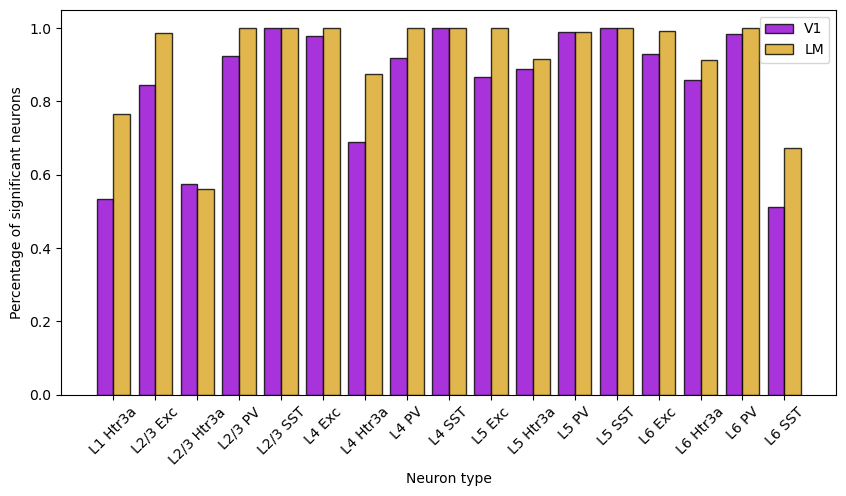

In [42]:
# apply it also to the neuron types
significant_cell_types_v1 = [cell_types_v1[neuron] for neuron in significant_neurons_v1]
significant_cell_types_lm = [cell_types_lm[neuron] for neuron in significant_neurons_lm]
significant_cell_types_v1_dis = [cell_types_v1[neuron] for neuron in significant_neurons_v1_dis]

# compute the percentage of significant neurons in each neuron type
percentage_v1 = np.zeros(len(unique_cell_types))
percentage_lm = np.zeros(len(unique_cell_types))

for type in unique_cell_types:
    # count number of type in cell_types_v1
    n_type_v1 = cell_types_v1.count(type)
    n_type_lm = cell_types_lm.count(type)

    # count number of type in significant_cell_types_v1
    n_type_significant_v1 = significant_cell_types_v1.count(type)
    n_type_significant_lm = significant_cell_types_lm.count(type)

    # compute the percentage
    percentage_v1[unique_cell_types.index(type)] = n_type_significant_v1 / n_type_v1
    percentage_lm[unique_cell_types.index(type)] = n_type_significant_lm / n_type_lm


# plot the percentage of significant neurons in each neuron type
plt.figure(figsize = (10,5))
bar_width = 0.4  # Define the width of the bars
x = np.arange(len(unique_cell_types))  # Define the x-coordinates of the bars

plt.bar(x - bar_width/2, percentage_v1, bar_width, color='darkviolet', label='V1', alpha=0.8, edgecolor='black')
plt.bar(x + bar_width/2, percentage_lm, bar_width, color='goldenrod', label='LM', alpha=0.8, edgecolor='black')

plt.xticks(x, unique_cell_types, rotation=45)   # Set the x-ticks to the middle of the bars
plt.xlabel('Neuron type')
plt.ylabel('Percentage of significant neurons')
plt.legend()
plt.show()

## Remove inverse RF neurons from significant neurons

### Visualization for 1 neuron

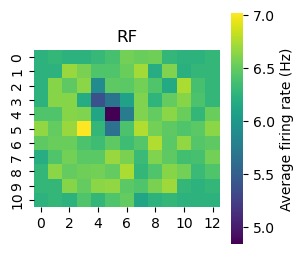

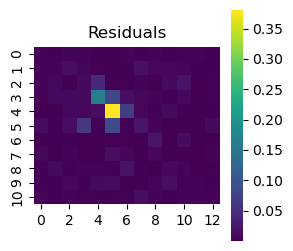

Max residual: 0.38066919075200145
Max residual value: [4.84]
Max residual value after substraction: [-1.58]


In [201]:
inverse_indices_v1 = []

# for neuron in range(n_neurons_v1):
neuron = 1031
neuron_rf_ = v1_sums[:,:,neuron] # select the neuron
# make a copy
neuron_rf = neuron_rf_.copy()

# set to median all the values below a th
median = np.median(neuron_rf)
th = median - 2*np.std(neuron_rf)
neuron_rf[neuron_rf < th] = median

# plot the RF
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')
plt.show()

# compute the residuals
residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

# plot residuals
plt.figure(figsize=(3,3))
ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
plt.title('Residuals')
plt.show()

# check if the rf at the max residual location is above or below the median
max_residual = np.max(residuals)
max_residual_idx = np.where(residuals == max_residual)
max_residual_value = neuron_rf[max_residual_idx]
print('Max residual:', max_residual)
print('Max residual value:', max_residual_value)

# substract the median of the RF to max_residual_value 
max_residual_value -= median
print('Max residual value after substraction:', max_residual_value)


### For all neurons

In [224]:
inverse_indices_v1 = np.zeros((n_neurons_v1)) # if the value is + the rf is normal, if it is -, the rf is inverse

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf_ = v1_sums[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    max_residual_diff = neuron_rf[max_residual_idx] - median

    inverse_indices_v1[neuron] = np.mean(max_residual_diff)

# Do the same for LM
inverse_indices_lm = np.zeros((n_neurons_lm)) # if the value is + the rf is normal, if it is -, the rf is inverse

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf_ = lm_all[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    max_residual_diff = neuron_rf[max_residual_idx] - median

    inverse_indices_lm[neuron] = np.mean(max_residual_diff)

# # Do the same for V1 disconnected
inverse_indices_v1_dis = np.zeros((n_neurons_v1)) # if the value is + the rf is normal, if it is -, the rf is inverse

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf_ = v1_sums_dis[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()
     # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median
     # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    max_residual_diff = neuron_rf[max_residual_idx] - median

    inverse_indices_v1_dis[neuron] = np.mean(max_residual_diff)

 52%|█████▏    | 27075/51978 [00:02<00:02, 8732.80it/s] /tmp/ipykernel_2437261/3864594350.py:14: RuntimeWarning: invalid value encountered in divide
  residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)
/home/sofiagil/.conda/envs/tfm_jupyter/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/sofiagil/.conda/envs/tfm_jupyter/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 31%|███       | 16219/51978 [00:01<00:03, 11056.59it/s]/tmp/ipykernel_2437261/3864594350.py:58: RuntimeWarning: invalid value encountered in divide
  residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)
100%|██████████| 51978/51978 [00:04<00:00, 11107.80it/s]


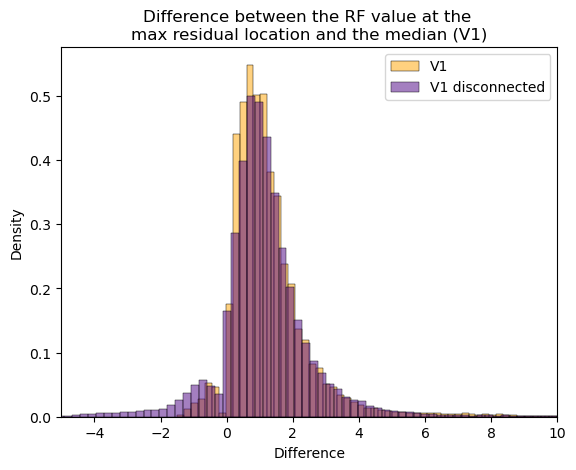

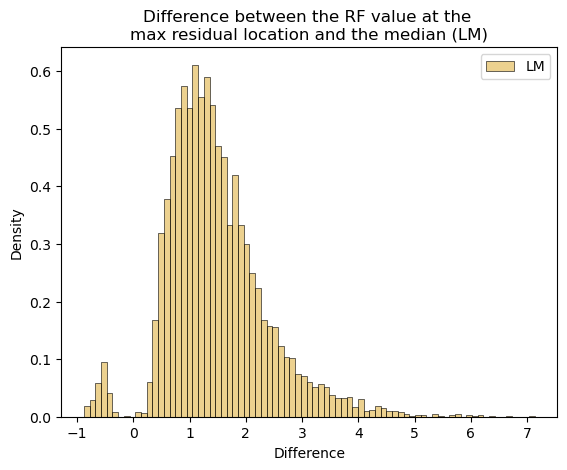

In [225]:
# plot overlapped histograms for v1 and v1 disconnected
plt.figure()
n_bins = 100
sns.histplot(inverse_indices_v1, bins = n_bins, color='mediumseagreen', label='V1', stat='density', alpha=0.5)
sns.histplot(inverse_indices_v1_dis, bins = n_bins, color='indigo', label='V1 disconnected', stat='density', alpha=0.5)
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Difference between the RF value at the \nmax residual location and the median (V1)')
plt.xlim([-5,10])
plt.legend()
plt.show()

# plot histogram for LM
plt.figure()
sns.histplot(inverse_indices_lm, color='goldenrod', label='LM', stat='density', alpha=0.5)
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Difference between the RF value at the \nmax residual location and the median (LM)')
plt.legend()
plt.show()

In [226]:
# print the percentage of neurons with inverse RF
percentage_v1 = np.sum(inverse_indices_v1 < 0) / n_neurons_v1
percentage_lm = np.sum(inverse_indices_lm < 0) / n_neurons_lm
percentage_v1_dis = np.sum(inverse_indices_v1_dis < 0) / n_neurons_v1

print('Percentage of V1 neurons with inverse RF:', percentage_v1)
print('Percentage of LM neurons with inverse RF:', percentage_lm)
print('Percentage of V1 disconnected neurons with inverse RF:', percentage_v1_dis)

Percentage of V1 neurons with inverse RF: 0.03584208703682327
Percentage of LM neurons with inverse RF: 0.025627191799298624
Percentage of V1 disconnected neurons with inverse RF: 0.08603640001539113


In [242]:
# Recompute significant neurons
# Selection of significant neurons (p-value<p_value_th) and not inverse
p_value_th = 0.05
significant_neurons_v1 = np.where((p_values_v1 < p_value_th) & (inverse_indices_v1 >= 0))[0]
significant_neurons_lm = np.where((p_values_lm < p_value_th) & (inverse_indices_lm >= 0))[0]
significant_neurons_v1_dis = np.where((p_values_v1_dis < p_value_th) & (inverse_indices_v1_dis >= 0))[0]

# apply it also to the neuron types
significant_cell_types_v1 = [cell_types_v1[neuron] for neuron in significant_neurons_v1]
significant_cell_types_lm = [cell_types_lm[neuron] for neuron in significant_neurons_lm]
significant_cell_types_v1_dis = [cell_types_v1[neuron] for neuron in significant_neurons_v1_dis]

## Remove neurons with no maximum RF close to median RF

### Visualization for 1 neuron

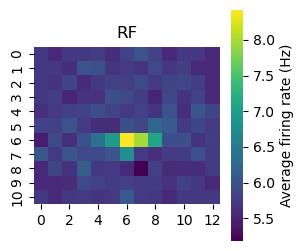

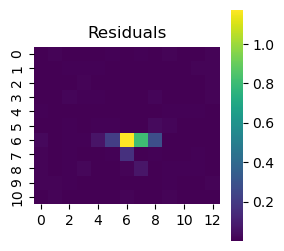

Max residual: 1.1730171581031037
Max residual value: 8.42
Ratio: 0.47202797202797186
Area: 200.0
P-value: 0.0


In [59]:
# for neuron in range(n_neurons_v1):
neuron = 1233
neuron_rf_ = v1_sums_dis[:,:,neuron] # select the neuron
# make a copy
neuron_rf = neuron_rf_.copy()

# set to median all the values below a th
median = np.median(neuron_rf)
th = median - 2*np.std(neuron_rf)
neuron_rf[neuron_rf < th] = median

# plot the RF
plt.figure(figsize =(3,3))
ax = sns.heatmap(neuron_rf.T, cmap='viridis', cbar_kws={'label': 'Average firing rate (Hz)'}, square = True)
plt.title('RF')
plt.show()

# compute the residuals
residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

# plot residuals
plt.figure(figsize=(3,3))
ax = sns.heatmap(residuals.T, cmap='viridis', square = True)
plt.title('Residuals')
plt.show()

# check if the rf at the max residual location is above or below the median
max_residual = np.max(residuals)
max_residual_idx = np.where(residuals == max_residual)
max_residual_rf_value = np.max(neuron_rf[max_residual_idx])
print('Max residual:', max_residual)
print('Max residual value:', max_residual_rf_value)

# compute difference ration between the maximum and the median
ratio_diff = max_residual_rf_value / median - 1
print('Ratio:', ratio_diff)

# print the area of that neuron
area = rf_areas_v1[neuron]
print('Area:', area)

# print its p-value from the test
p_value = p_values_v1[neuron]
print('P-value:', p_value)

### For all neurons

In [63]:
large_max_v1 = np.zeros(n_neurons_v1)
diff_percentage = 0.10

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf_ = v1_sums[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    try:
        max_residual_rf_value = np.max(neuron_rf[max_residual_idx])
    except:
        max_residual_rf_value = median

    # compute difference ration between the maximum and the median
    ratio_diff = max_residual_rf_value / median - 1

    # check if the ratio is above a threshold
    large_max_v1[neuron] = ratio_diff - diff_percentage

# Do the same for LM
large_max_lm = np.zeros(n_neurons_lm)

for neuron in tqdm(range(n_neurons_lm)):
    neuron_rf_ = lm_all[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    try:
        max_residual_rf_value = np.max(neuron_rf[max_residual_idx])
    except:
        max_residual_rf_value = median

    # compute difference ration between the maximum and the median
    ratio_diff = max_residual_rf_value / median - 1

    # check if the ratio is above a threshold
    large_max_lm[neuron] = ratio_diff - diff_percentage

# Do the same for V1 disconnected
large_max_v1_dis = np.zeros(n_neurons_v1)

for neuron in tqdm(range(n_neurons_v1)):
    neuron_rf_ = v1_sums_dis[:,:,neuron] # select the neuron
    # make a copy
    neuron_rf = neuron_rf_.copy()

    # set to median all the values below a th
    median = np.median(neuron_rf)
    th = median - 2*np.std(neuron_rf)
    neuron_rf[neuron_rf < th] = median

    # compute the residuals
    residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)

    # check if the rf at the max residual location is above or below the median
    max_residual = np.max(residuals)
    max_residual_idx = np.where(residuals == max_residual)
    try:
        max_residual_rf_value = np.max(neuron_rf[max_residual_idx])
    except:
        max_residual_rf_value = median

    # compute difference ration between the maximum and the median
    ratio_diff = max_residual_rf_value / median - 1

    # check if the ratio is above a threshold
    large_max_v1_dis[neuron] = ratio_diff - diff_percentage

 25%|██▌       | 13076/51978 [00:03<00:08, 4847.10it/s]/tmp/ipykernel_2708355/1416004486.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_diff = max_residual_rf_value / median - 1
 52%|█████▏    | 27246/51978 [00:06<00:05, 4285.30it/s]/tmp/ipykernel_2708355/1416004486.py:15: RuntimeWarning: invalid value encountered in divide
  residuals = (neuron_rf - np.mean(neuron_rf))**2 / np.mean(neuron_rf)
/tmp/ipykernel_2708355/1416004486.py:26: RuntimeWarning: invalid value encountered in scalar divide
  ratio_diff = max_residual_rf_value / median - 1
 42%|████▏     | 3115/7414 [00:01<00:02, 2118.81it/s]/tmp/ipykernel_2708355/1416004486.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_diff = max_residual_rf_value / median - 1
 25%|██▍       | 12740/51978 [00:02<00:05, 7240.55it/s]/tmp/ipykernel_2708355/1416004486.py:86: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_diff = max_residual_rf_value / median - 1
 32%|███▏      

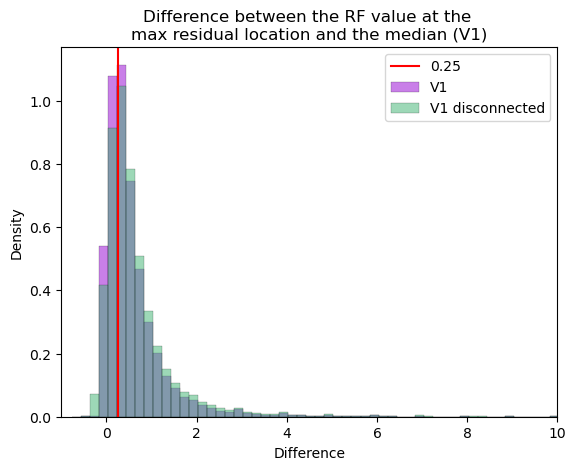

In [79]:
# plot a histogram of the large max values
# Define the bin width
# Define the bin width
bin_width = 0.2

# Define the range of data to consider
data_range = (-1, 50)

# Calculate the bin edges within the data range
n_bins = np.arange(max(min(large_max_v1), data_range[0]), min(max(large_max_v1), data_range[1]) + bin_width, bin_width)

plt.figure()
sns.histplot(large_max_v1,bins = n_bins, color='darkviolet', stat='density', alpha=0.5, label='V1')
sns.histplot(large_max_v1_dis,bins = n_bins, color='mediumseagreen', stat='density', alpha=0.5, label='V1 disconnected')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Difference between the RF value at the \nmax residual location and the median (V1)')
# plot a line at 0.25
plt.axvline(0.25, color='red', label='0.25')
plt.legend()
plt.xlim([-1,10])
plt.show()

## RF computation for significant neurons (all V1 and LM neurons)

In [47]:
# Filter the rf_areas_v1 and rf_areas_lm with the significant neurons
rf_areas_v1_significant = rf_areas_v1[significant_neurons_v1]
rf_areas_lm_significant = rf_areas_lm[significant_neurons_lm]
rf_areas_v1_dis_significant = rf_areas_v1_dis[significant_neurons_v1_dis]

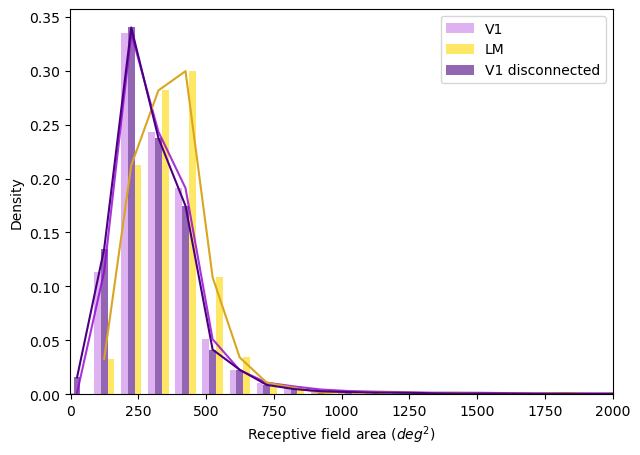

Median V1 RF area: 300.0
Median LM RF area: 300.0
Median V1 disconnected RF area: 300.0

Mean V1 RF area: 323.4474841336886
Mean LM RF area: 362.44274809160305
Mean V1 disconnected RF area: 577.9573573279866

5 and 95 percentiles for V1: 100.0 600.0
5 and 95 percentiles for LM: 200.0 600.0
5 and 95 percentiles for V1 disconnected: 100.0 700.0

Mean V1 RF area inside 0.05 and 0.95 percentiles: 294.90719961982205
Mean LM RF area inside 0.05 and 0.95 percentiles: 374.8692152917505
Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles: 298.1632278209759

Mean removing large outliers (>75 percentile):
Mean V1 RF area: 270.8264826436329
Mean LM RF area: 325.5195961995249
Mean V1 disconnected RF area: 265.7668838556211


In [48]:
# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_v1_significant, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_lm_significant, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_v1_dis_significant, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (7,5))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Density')
plt.xlim(-1, 2000)
plt.legend()

# compute percentiles 5 and 95 for V1 and LM
q1_v1 = np.percentile(rf_areas_v1_significant, 5)
q3_v1 = np.percentile(rf_areas_v1_significant, 95)
q1_lm = np.percentile(rf_areas_lm_significant, 5)
q3_lm = np.percentile(rf_areas_lm_significant, 95)
q1_v1dis = np.percentile(rf_areas_v1_dis_significant, 5)
q3_v1dis = np.percentile(rf_areas_v1_dis_significant, 95)

# # plot the quartiles
# plt.axvline(q1_v1, color='darkviolet', linestyle='--')
# plt.axvline(q3_v1, color='darkviolet', linestyle='--')
# plt.axvline(q1_lm, color='gold', linestyle='--')
# plt.axvline(q3_lm, color='gold', linestyle='--')

plt.show()

# compute the median
median_v1 = np.median(rf_areas_v1_significant)
median_lm = np.median(rf_areas_lm_significant)
median_v1dis = np.median(rf_areas_v1_dis_significant)

print('Median V1 RF area:', median_v1)
print('Median LM RF area:', median_lm)
print('Median V1 disconnected RF area:', median_v1dis)

# compute the mean
mean_v1 = np.mean(rf_areas_v1_significant)
mean_lm = np.mean(rf_areas_lm_significant)
mean_v1dis = np.mean(rf_areas_v1_dis_significant)

print()
print('Mean V1 RF area:', mean_v1)
print('Mean LM RF area:', mean_lm)
print('Mean V1 disconnected RF area:', mean_v1dis)

# compute the mean inside the 5th and 95th percentiles
mean_v1 = np.mean(rf_areas_v1_significant[(rf_areas_v1_significant > q1_v1) & (rf_areas_v1_significant < q3_v1)])
mean_lm = np.mean(rf_areas_lm_significant[(rf_areas_lm_significant > q1_lm) & (rf_areas_lm_significant < q3_lm)])
mean_v1dis = np.mean(rf_areas_v1_dis_significant[(rf_areas_v1_dis_significant > q1_v1dis) & (rf_areas_v1_dis_significant < q3_v1dis)])

print()
print("5 and 95 percentiles for V1:", q1_v1, q3_v1)
print("5 and 95 percentiles for LM:", q1_lm, q3_lm)
print("5 and 95 percentiles for V1 disconnected:", q1_v1dis, q3_v1dis)

print()
print('Mean V1 RF area inside 0.05 and 0.95 percentiles:', mean_v1)
print('Mean LM RF area inside 0.05 and 0.95 percentiles:', mean_lm)
print('Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles:', mean_v1dis)

# compute the mean leaving out the outliers larger than percentil 75
q75_v1 = np.percentile(rf_areas_v1_significant, 95)
q75_lm = np.percentile(rf_areas_lm_significant, 95)
q75_v1dis = np.percentile(rf_areas_v1_dis_significant, 95)

print()
print("Mean removing large outliers (>75 percentile):")
mean_v1 = np.mean(rf_areas_v1_significant[rf_areas_v1_significant < q75_v1])
mean_lm = np.mean(rf_areas_lm_significant[rf_areas_lm_significant < q75_lm])
mean_v1dis = np.mean(rf_areas_v1_dis_significant[rf_areas_v1_dis_significant < q75_v1dis])

print('Mean V1 RF area:', mean_v1)
print('Mean LM RF area:', mean_lm)
print('Mean V1 disconnected RF area:', mean_v1dis)

In [49]:
# print the id of a significant neuron with a RF larger than 2000
idx = np.where(rf_areas_v1_significant > 2000)[0][0]
print('Neuron with RF area > 2000:', significant_neurons_v1_dis[idx])

Neuron with RF area > 2000: 33


## RF computation for significant neurons by types

In [253]:
# update the layers mask to include only significant neurons
layer_mask_v1_types_significant = [[cell_type == unique_cell_types[i] for cell_type in significant_cell_types_v1] for i in range(len(unique_cell_types))]
layer_mask_lm_types_significant = [[cell_type == unique_cell_types[i] for cell_type in significant_cell_types_lm] for i in range(len(unique_cell_types))]
layer_mask_v1dis_types_significant = [[cell_type == unique_cell_types[i] for cell_type in significant_cell_types_v1_dis] for i in range(len(unique_cell_types))]

# Select the neuron type to filter
t = 9
type = unique_cell_types[t]
print("You have selected the type: ", type)

# select the given neuron type receptive field
rf_areas_type_v1_significant = rf_areas_v1_significant[layer_mask_v1_types_significant[t]]
rf_areas_type_lm_significant = rf_areas_lm_significant[layer_mask_lm_types_significant[t]]
rf_areas_type_v1dis_significant = rf_areas_v1_dis_significant[layer_mask_v1dis_types_significant[t]]

You have selected the type:  L5 Exc


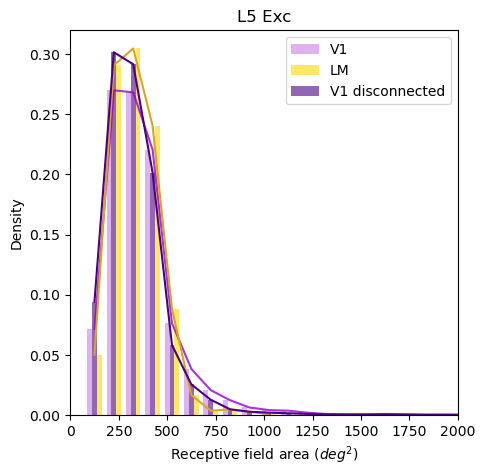

Median V1 RF area: 300.0
Median LM RF area: 300.0
Median V1 disconnected RF area: 300.0
Mean V1 RF area: 342.77528263899643
Mean LM RF area: 312.07056638811514
Mean V1 disconnected RF area: 307.31083844580775

 Mean V1 RF area inside 0.05 and 0.95 percentiles: 325.0443419652359
Mean LM RF area inside 0.05 and 0.95 percentiles: 294.0
Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles: 310.62590975254733


In [254]:
# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_type_v1_significant, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_type_lm_significant, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_type_v1dis_significant, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (5,5))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Density')
plt.xlim(-1, 2000)
# put neuron type as title
plt.title(type)
plt.legend()

# compute 5th and 95th percentiles
q1_v1 = np.percentile(rf_areas_type_v1_significant, 5)
q3_v1 = np.percentile(rf_areas_type_v1_significant, 95)
q1_lm = np.percentile(rf_areas_type_lm_significant, 5)
q3_lm = np.percentile(rf_areas_type_lm_significant, 95)

# plot the quartiles
# plt.axvline(q1_v1, color='darkviolet', linestyle='--')
# plt.axvline(q3_v1, color='darkviolet', linestyle='--')
# plt.axvline(q1_lm, color='gold', linestyle='--')
# plt.axvline(q3_lm, color='gold', linestyle='--')

plt.show()

# print the medians
print('Median V1 RF area:', np.median(rf_areas_type_v1_significant))
print('Median LM RF area:', np.median(rf_areas_type_lm_significant))
print('Median V1 disconnected RF area:', np.median(rf_areas_type_v1dis_significant))

# print the means
print('Mean V1 RF area:', np.mean(rf_areas_type_v1_significant))
print('Mean LM RF area:', np.mean(rf_areas_type_lm_significant))
print('Mean V1 disconnected RF area:', np.mean(rf_areas_type_v1dis_significant))

# compute the mean inside the 5th and 95th percentiles
mean_v1 = np.mean(rf_areas_type_v1_significant[(rf_areas_type_v1_significant > q1_v1) & (rf_areas_type_v1_significant < q3_v1)])
mean_lm = np.mean(rf_areas_type_lm_significant[(rf_areas_type_lm_significant > q1_lm) & (rf_areas_type_lm_significant < q3_lm)])
mean_v1dis = np.mean(rf_areas_type_v1dis_significant[(rf_areas_type_v1dis_significant > q1_v1) & (rf_areas_type_v1dis_significant < q3_v1)])

print('\n Mean V1 RF area inside 0.05 and 0.95 percentiles:', mean_v1)
print('Mean LM RF area inside 0.05 and 0.95 percentiles:', mean_lm)
print('Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles:', mean_v1dis)

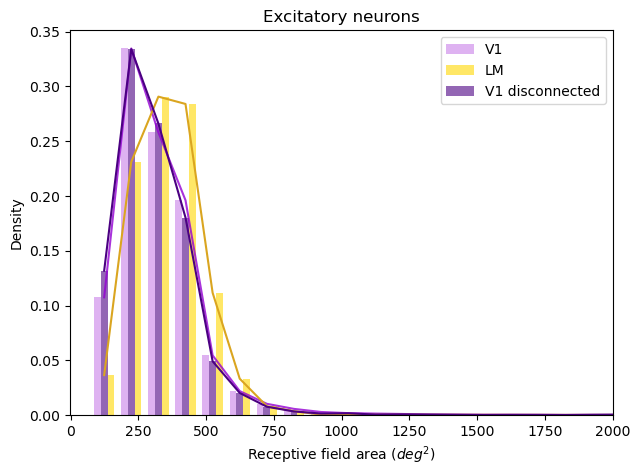

Median V1 RF area: 300.0
Median LM RF area: 300.0
Median V1 disconnected RF area: 300.0
Mean V1 RF area: 301.14193746167996
Mean LM RF area: 336.4629176854116
Mean V1 disconnected RF area: 289.82758620689657

 Mean V1 RF area inside 0.05 and 0.95 percentiles: 282.436590975349
Mean LM RF area inside 0.05 and 0.95 percentiles: 349.41843971631204
Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles: 280.3093542843113


In [248]:
# Now do it for all excitatory neurons together: L2/3 Exc, L4 Exc, L5 Exc, L6 Exc
types = [1, 5, 9, 13]

rf_areas_exc_v1 = np.zeros((0))
rf_areas_exc_lm = np.zeros((0))
rf_areas_exc_v1dis = np.zeros((0))

for t in types:
    rf_areas_exc_v1 = np.concatenate((rf_areas_exc_v1, rf_areas_v1_significant[layer_mask_v1_types_significant[t]]))
    rf_areas_exc_lm = np.concatenate((rf_areas_exc_lm, rf_areas_lm_significant[layer_mask_lm_types_significant[t]]))
    rf_areas_exc_v1_dis = np.concatenate((rf_areas_exc_v1dis, rf_areas_v1_dis_significant[layer_mask_v1dis_types_significant[t]]))

# Define bin edges and centers
bin_edges = np.arange(-1, 100*100, 50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate histograms
hist_v1, _ = np.histogram(rf_areas_exc_v1, bins=bin_edges)
hist_lm, _ = np.histogram(rf_areas_exc_lm, bins=bin_edges)
hist_v1_dis, _ = np.histogram(rf_areas_exc_v1_dis, bins=bin_edges)

# Normalize histograms
hist_v1 = hist_v1 / np.sum(hist_v1)
hist_lm = hist_lm / np.sum(hist_lm)
hist_v1_dis = hist_v1_dis / np.sum(hist_v1_dis)

# Width of each bar
width = (bin_edges[1] - bin_edges[0]) / 2

# Create bar plots
plt.figure(figsize = (7,5))
plt.bar(bin_centers - width, hist_v1, width=width, color='darkviolet', label='V1', alpha=0.3)
plt.bar(bin_centers + width, hist_lm, width=width, color='gold', label='LM', alpha=0.6)
plt.bar(bin_centers, hist_v1_dis, width=width, color='indigo', label='V1 disconnected', alpha=0.6)

# Create line plots for non-zero values
plt.plot(bin_centers[hist_v1 > 0], hist_v1[hist_v1 > 0], color='darkviolet', alpha = 0.8)
plt.plot(bin_centers[hist_lm > 0], hist_lm[hist_lm > 0], color='goldenrod')
plt.plot(bin_centers[hist_v1_dis > 0], hist_v1_dis[hist_v1_dis > 0], color='indigo')

plt.xlabel(r'Receptive field area ($deg^2$)')
plt.ylabel('Density')
plt.xlim(-1, 2000)
# put neuron type as title
plt.title('Excitatory neurons')
plt.legend()

# compute percentile 5 and 95
q1_v1 = np.percentile(rf_areas_exc_v1, 5)
q3_v1 = np.percentile(rf_areas_exc_v1, 95)
q1_lm = np.percentile(rf_areas_exc_lm, 5)
q3_lm = np.percentile(rf_areas_exc_lm, 95)
q1_v1dis = np.percentile(rf_areas_exc_v1_dis, 5)
q3_v1dis = np.percentile(rf_areas_exc_v1_dis, 95)

# plot the quartiles
# plt.axvline(q1_v1, color='darkviolet', linestyle='--')
# plt.axvline(q3_v1, color='darkviolet', linestyle='--')
# plt.axvline(q1_lm, color='gold', linestyle='--')
# plt.axvline(q3_lm, color='gold', linestyle='--')

plt.show()

# print the medians
print('Median V1 RF area:', np.median(rf_areas_exc_v1))
print('Median LM RF area:', np.median(rf_areas_exc_lm))
print('Median V1 disconnected RF area:', np.median(rf_areas_exc_v1_dis))

# print the averages
print('Mean V1 RF area:', np.mean(rf_areas_exc_v1))
print('Mean LM RF area:', np.mean(rf_areas_exc_lm))
print('Mean V1 disconnected RF area:', np.mean(rf_areas_exc_v1_dis))

# print the mean inside the 5th and 95th percentiles
mean_v1 = np.mean(rf_areas_exc_v1[(rf_areas_exc_v1 > q1_v1) & (rf_areas_exc_v1 < q3_v1)])
mean_lm = np.mean(rf_areas_exc_lm[(rf_areas_exc_lm > q1_lm) & (rf_areas_exc_lm < q3_lm)])
mean_v1dis = np.mean(rf_areas_exc_v1_dis[(rf_areas_exc_v1_dis > q1_v1dis) & (rf_areas_exc_v1_dis < q3_v1dis)])

print('\n Mean V1 RF area inside 0.05 and 0.95 percentiles:', mean_v1)
print('Mean LM RF area inside 0.05 and 0.95 percentiles:', mean_lm)
print('Mean V1 disconnected RF area inside 0.05 and 0.95 percentiles:', mean_v1dis)

